In [1]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as scistat
import statsmodels.api as sm

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load data
csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_agb_dbg_indicies_tile.csv"

In [3]:
df = pd.read_csv(csv_file, parse_dates=['basal_dt'])
# set uid to index
df.set_index("uid", inplace=True)
df.shape

(49, 32)

<AxesSubplot:xlabel='b2_dbg_mean', ylabel='bio_agb_kg1ha'>

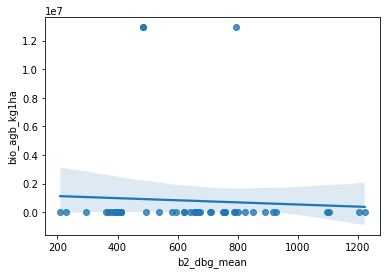

In [42]:
sns.regplot(y = df.bio_agb_kg1ha, x=df.b2_dbg_mean)

In [4]:
df.columns

Index(['site', 'basal_dt', 'bio_agb_kg1ha', 'b1_dbg_mean', 'b2_dbg_mean',
       'b3_dbg_mean', 'b4_dbg_mean', 'b5_dbg_mean', 'b6_dbg_mean', 'ratio32a',
       'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a',
       'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa',
       'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa',
       'MSRa'],
      dtype='object')

In [5]:
df

site   basal_dt  bio_agb_kg1ha  b1_dbg_mean  b2_dbg_mean  \
uid                                                                   
52        agb02 2012-04-17   0.000000e+00   542.777778   669.777778   
132  NTAGFU0010 2012-05-09   1.293600e+03   533.444444   852.333333   
133  NTAGFU0011 2012-05-10   2.587200e+02   469.250000   658.500000   
134  NTAGFU0012 2012-05-11   1.796667e+03   499.250000   711.916667   
135  NTAGFU0013 2012-05-12   3.880800e+02   574.250000   790.500000   
137  NTAGFU0015 2012-05-14   1.293600e+02   491.000000   709.583333   
136  NTAGFU0014 2012-05-14   1.164240e+03   547.416667   800.583333   
138  NTAGFU0016 2012-05-16   2.587200e+02   584.333333   758.000000   
139  NTAGFU0017 2012-05-17   1.293471e+07   329.750000   486.062500   
140  NTAGFU0018 2012-05-18   1.293471e+07   350.500000   485.666667   
141  NTAGFU0019 2012-05-18   5.174400e+02   461.250000   654.750000   
20        nt004 2012-05-24   0.000000e+00   211.111111   403.888889   
55      girra01 2012-06-05   1.799476e+04    99.777778   209.444444   
2       girra02 2012-06-05   3.123120e+03   219.111111   367.333333   
56       hshr01 2012-06-06   3.519971e+04   118.857143   294.714286   
59       wedo01 2012-06-06   4.370912e+03   217.444444   411.222222   
57        hsf01 2012-07-10   2.570169e+04   324.416667   379.000000   
58        hsf02 2012-07-10   2.663629e+04   340.777778   410.555556   
60       wedo03 2012-07-10   1.133813e+04   401.062500   494.312500   
54         ep01 2012-07-13   1.875720e+04   359.500000   398.500000   
100      legu02 2012-10-05   0.000000e+00   534.444444   759.111111   
99       legu01 2012-10-05   2.217600e+03   499.222222   754.777778   
101      legu03 2012-10-06   0.000000e+00   835.833333  1223.250000   
103      legu05 2012-10-07   4.723999e+03   425.888889   642.333333   
102      legu04 2012-10-07   3.648393e+03   477.916667   751.166667   
104      legu06 2012-10-07   7.715400e+03   365.125000   579.875000   
105      legu07 2012-10-08   9.708965e+03   415.555556   620.333333   
106      legu08 2012-10-08   4.717188e+03   397.000000   657.111111   
9         auv01 2012-10-09   4.268880e+03   549.666667   786.888889   
10        auv02 2012-10-10   3.086160e+03   618.777778   928.888889   
11        auv03 2012-10-10   1.349040e+03   594.333333   892.222222   
12        auv04 2012-10-10   0.000000e+00   552.444444   823.777778   
13        auv05 2012-10-11   7.392000e+01   588.666667   918.666667   
16        auv08 2012-10-11   0.000000e+00   701.222222  1097.555556   
15        auv07 2012-10-11   0.000000e+00   614.888889  1103.888889   
14        auv06 2012-10-11   0.000000e+00   790.583333  1205.750000   
1         lit01 2013-04-26   2.558507e+04    68.583333   227.000000   
121  NTADAC0001 2013-05-28   2.587200e+03   475.444444   390.111111   
62        lto05 2013-05-28   0.000000e+00   477.916667   393.916667   
61        lto04 2013-05-28   0.000000e+00   351.750000   536.666667   
165  NTAMGD0002 2014-03-12   1.293471e+07   747.444444   796.222222   
164  NTAMGD0001 2014-03-13   5.778080e+03   682.875000   673.500000   
177  NTTDAC0001 2014-03-18   1.293600e+02   201.500000   363.000000   
179  NTTPCK0001 2014-03-19   3.880800e+02   197.166667   389.083333   
169  NTAPCK0001 2016-05-04   9.895550e+02   442.583333   658.500000   
122  NTADAC0002 2016-05-06   9.787396e+02   415.833333   596.166667   
118  NTAARP0001 2016-06-02   1.358280e+03   389.888889   622.111111   
119  NTAARP0002 2016-06-02   1.157053e+03   434.000000   667.888889   
120  NTAARP0003 2016-06-03   9.702000e+02   469.166667   413.083333   

     b3_dbg_mean  b4_dbg_mean  b5_dbg_mean  b6_dbg_mean  ratio32a  ...  \
uid                                                                ...   
52    756.000000  1778.666667  1930.555556  1278.111111  11287326  ...   
132  1099.444444  2020.222222  2165.000000  1461.555556  12899231  ...   
133   753.250000  1590.250000  2178.500000  1382.250000  11438876  ...   
134   813.166667  1

In [6]:
# drop unwanted columns
df.drop(['site', 'basal_dt'], axis=1, inplace=True)

In [7]:
#drop null values
df.dropna(inplace=True)

In [8]:
df.index.nunique()

49

In [9]:
df.sample(8, random_state=2).T

uid                     103           55           177           57   \
bio_agb_kg1ha  4.723999e+03  1.799476e+04       129.36  2.570169e+04   
b1_dbg_mean    4.258889e+02  9.977778e+01       201.50  3.244167e+02   
b2_dbg_mean    6.423333e+02  2.094444e+02       363.00  3.790000e+02   
b3_dbg_mean    9.457778e+02  3.322222e+02       500.00  3.312500e+02   
b4_dbg_mean    2.081444e+03  1.744333e+03      2020.50  1.694250e+03   
b5_dbg_mean    2.591222e+03  1.695444e+03      1537.50  1.035417e+03   
b6_dbg_mean    1.599667e+03  8.156667e+02       724.50  4.472500e+02   
ratio32a       1.472410e+07  1.586207e+07  13774105.00  8.740106e+06   
ratio42a       3.240443e+07  8.328382e+07  55661157.00  4.470317e+07   
ratio43a       2.200775e+07  5.250502e+07  40410000.00  5.114717e+07   
ratio52a       4.034077e+07  8.094960e+07  42355372.00  2.731970e+07   
ratio53a       2.739779e+07  5.103344e+07  30750000.00  3.125786e+07   
ratio54a       1.244915e+07  9.719727e+06   7609503.00  6.111357e+06   
ratio62a       2.490400e+07  3.894430e+07  19958678.00  1.180079e+07   
ratio63a       1.691377e+07  2.455184e+07  14490000.00  1.350189e+07   
ratio64a       7.685368e+06  4.676094e+06   3585746.00  2.639811e+06   
ratio65a       6.173406e+06  4.810931e+06   4712195.00  4.319517e+06   
GSAVIa         2.794898e+06  3.311520e+06   3366518.00  2.788774e+06   
GNDVIa         5.284613e+06  7.859703e+06   6953420.00  6.343464e+06   
CVIa           4.771268e+07  1.325537e+08  76649288.00  3.903579e+07   
NDGIa         -1.909263e+06 -2.273567e+06  -1587486.00  6.760560e+05   
RIa            1.909263e+06  2.273567e+06   1587486.00 -6.760560e+05   
NBRa           1.309783e+06  3.630324e+06   4723032.00  5.824381e+06   
NDIIa         -1.091610e+06  1.424830e+05   1357886.00  2.414804e+06   
GDVIa          1.439000e+06  1.535000e+06   1657000.00  1.315000e+06   
MSAVIa         1.844535e+06  2.591707e+06   2674842.00  2.504771e+06   
DVIa           1.136000e+06  1.412000e+06   1520000.00  1.363000e+06   
SAVIa          2.123100e+06  2.993217e+06   3031915.00  2.910320e+06   
NDVIa          3.754131e+06  6.801541e+06   6031746.00  6.730864e+06   
MSRa           4.839530e+06  1.291945e+07  10099751.00  1.262261e+07   

uid                     14            169           119           2    
bio_agb_kg1ha  0.000000e+00  9.895550e+02  1.157053e+03  3.123120e+03  
b1_dbg_mean    7.905833e+02  4.425833e+02  4.340000e+02  2.191111e+02  
b2_dbg_mean    1.205750e+03  6.585000e+02  6.678889e+02  3.673333e+02  
b3_dbg_mean    1.725917e+03  8.695833e+02  1.059667e+03  5.231111e+02  
b4_dbg_mean    2.667667e+03  2.221750e+03  1.828889e+03  1.508000e+03  
b5_dbg_mean    3.747333e+03  2.171000e+03  2.400444e+03  1.915667e+03  
b6_dbg_mean    3.027000e+03  1.282083e+03  2.005333e+03  1.023333e+03  
ratio32a       1.431405e+07  1.320552e+07  1.586591e+07  1.424077e+07  
ratio42a       2.212454e+07  3.373956e+07  2.738313e+07  4.105263e+07  
ratio43a       1.545652e+07  2.554959e+07  1.725910e+07  2.882753e+07  
ratio52a       3.107886e+07  3.296887e+07  3.594078e+07  5.215064e+07  
ratio53a       2.171213e+07  2.496598e+07  2.265283e+07  3.662065e+07  
ratio54a       1.404723e+07  9.771576e+06  1.312515e+07  1.270336e+07  
ratio62a       2.510471e+07  1.946975e+07  3.002495e+07  2.785844e+07  
ratio63a       1.753851e+07  1.474365e+07  1.892419e+07  1.956245e+07  
ratio64a       1.134700e+07  5.770601e+06  1.096476e+07  6.786030e+06  
ratio65a       8.077744e+06  5.905497e+06  8.354009e+06  5.341918e+06  
GSAVIa         2.471821e+06  2.975631e+06  2.323549e+06  2.489455e+06  
GNDVIa         3.775826e+06  5.428968e+06  4.653307e+06  6.085333e+06  
CVIa           3.168386e+07  4.457759e+07  4.351315e+07  5.855593e+07  
NDGIa         -1.774744e+06 -1.381794e+06 -2.271147e+06 -1.752809e+06  
RIa            1.774744e+06  1.381794e+06  2.271147e+06  1.752809e+06  
NBRa          -6.322440e+05  2.680560e+06 -4.617790e+05  1.916239e+06  
NDIIa         -1.683817e+06  1.138430e+

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.describe())

       bio_agb_kg1ha  b1_dbg_mean  b2_dbg_mean  b3_dbg_mean  b4_dbg_mean  \
count   4.900000e+01    49.000000    49.000000    49.000000    49.000000   
mean    7.966220e+05   448.795979   641.214124   876.943165  1959.258248   
std     3.131921e+06   171.946333   240.958012   396.347426   433.933558   
min     0.000000e+00    68.583333   209.444444   225.500000   624.111111   
25%     1.293600e+02   351.750000   411.222222   551.166667  1778.166667   
50%     1.349040e+03   469.166667   657.111111   869.583333  2020.500000   
75%     5.778080e+03   549.666667   786.888889  1099.444444  2221.750000   
max     1.293471e+07   835.833333  1223.250000  1739.111111  2770.666667   

       b5_dbg_mean  b6_dbg_mean      ratio32a      ratio42a      ratio43a  \
count    49.000000    49.000000  4.900000e+01  4.900000e+01  4.900000e+01   
mean   2326.208698  1620.149514  1.334362e+07  3.454876e+07  2.794803e+07   
std     721.994933   832.052769  2.155845e+06  1.622212e+07  1.846793e+07   
min    

In [11]:
key_var = df.columns.tolist()

In [12]:
df_key = df[key_var]

In [13]:
df_key

bio_agb_kg1ha  b1_dbg_mean  b2_dbg_mean  b3_dbg_mean  b4_dbg_mean  \
uid                                                                      
52    0.000000e+00   542.777778   669.777778   756.000000  1778.666667   
132   1.293600e+03   533.444444   852.333333  1099.444444  2020.222222   
133   2.587200e+02   469.250000   658.500000   753.250000  1590.250000   
134   1.796667e+03   499.250000   711.916667   813.166667  1797.666667   
135   3.880800e+02   574.250000   790.500000   896.875000  1913.125000   
137   1.293600e+02   491.000000   709.583333   888.166667  1778.166667   
136   1.164240e+03   547.416667   800.583333  1004.833333  2122.416667   
138   2.587200e+02   584.333333   758.000000   963.000000  2281.333333   
139   1.293471e+07   329.750000   486.062500   575.937500  1678.625000   
140   1.293471e+07   350.500000   485.666667   635.250000  1456.833333   
141   5.174400e+02   461.250000   654.750000   897.125000  1981.250000   
20    0.000000e+00   211.111111   403.888889   605.444444  1848.555556   
55    1.799476e+04    99.777778   209.444444   332.222222  1744.333333   
2     3.123120e+03   219.111111   367.333333   523.111111  1508.000000   
56    3.519971e+04   118.857143   294.714286   258.142857  2298.000000   
59    4.370912e+03   217.444444   411.222222   542.666667  2020.555556   
57    2.570169e+04   324.416667   379.000000   331.250000  1694.250000   
58    2.663629e+04   340.777778   410.555556   387.333333  1750.888889   
60    1.133813e+04   401.062500   494.312500   520.062500  1924.562500   
54    1.875720e+04   359.500000   398.500000   307.100000  2485.300000   
100   0.000000e+00   534.444444   759.111111  1126.444444  1999.444444   
99    2.217600e+03   499.222222   754.777778  1123.888889  1949.888889   
101   0.000000e+00   835.833333  1223.250000  1716.250000  2770.666667   
103   4.723999e+03   425.888889   642.333333   945.777778  2081.444444   
102   3.648393e+03   477.916667   751.166667  1130.833333  2125.333333   
104   7.715400e+03   365.125000   579.875000   788.625000  2431.187500   
105   9.708965e+03   415.555556   620.333333   850.111111  2155.000000   
106   4.717188e+03   397.000000   657.111111  1044.777778  2257.111111   
9     4.268880e+03   549.666667   786.888889  1091.000000  2120.555556   
10    3.086160e+03   618.777778   928.888889  1385.444444  2478.777778   
11    1.349040e+03   594.333333   892.222222  1338.222222  2292.333333   
12    0.000000e+00   552.444444   823.777778  1261.111111  2084.777778   
13    7.392000e+01   588.666667   918.666667  1360.111111  2085.555556   
16    0.000000e+00   701.222222  1097.555556  1631.777778  2479.666667   
15    0.000000e+00   614.888889  1103.888889  1739.111111  2350.222222   
14    0.000000e+00   790.583333  1205.750000  1725.916667  2667.666667   
1     2.558507e+04    68.583333   227.000000   225.500000  2042.083333   
121   2.587200e+03   475.444444   390.111111   543.111111   624.111111   
62    0.000000e+00   477.916667   393.916667   551.166667   643.250000   
61    0.000000e+00   351.750000   536.666667   794.583333  1961.333333   
165   1.293471e+07   747.444444   796.222222  1374.444444  2117.111111   
164   5.778080e+03   682.875000   673.500000  1025.125000  1435.187500   
177   1.293600e+02   201.500000   363.000000   500.000000  2020.500000   
179   3.880800e+02   197.166667   389.083333   367.666667  2110.083333   
169   9.895550e+02   442.583333   658.500000   869.583333  2221.750000   
122   9.787396e+02   415.833333   596.166667   785.833333  1774.000000   
118   1.358280e+03   389.888889   622.111111   919.666667  2298.555556   
119   1.157053e+03   434.000000   667.888889  1059.666667  1828.888889   
120   9.702000e+02   469.166667   413.083333   604.083333   924.166667   

     b5_dbg_mean  b6_dbg_mean  ratio32a  ratio42a  ratio43a  ...    NDGIa  \
uid                                                          ...            
52   1930.555556  1278.111111  11287326  26556072  23527337  ...  -610526   

In [14]:
df_key.describe()

bio_agb_kg1ha  b1_dbg_mean  b2_dbg_mean  b3_dbg_mean  b4_dbg_mean  \
count   4.900000e+01    49.000000    49.000000    49.000000    49.000000   
mean    7.966220e+05   448.795979   641.214124   876.943165  1959.258248   
std     3.131921e+06   171.946333   240.958012   396.347426   433.933558   
min     0.000000e+00    68.583333   209.444444   225.500000   624.111111   
25%     1.293600e+02   351.750000   411.222222   551.166667  1778.166667   
50%     1.349040e+03   469.166667   657.111111   869.583333  2020.500000   
75%     5.778080e+03   549.666667   786.888889  1099.444444  2221.750000   
max     1.293471e+07   835.833333  1223.250000  1739.111111  2770.666667   

       b5_dbg_mean  b6_dbg_mean      ratio32a      ratio42a      ratio43a  \
count    49.000000    49.000000  4.900000e+01  4.900000e+01  4.900000e+01   
mean   2326.208698  1620.149514  1.334362e+07  3.454876e+07  2.794803e+07   
std     721.994933   832.052769  2.155845e+06  1.622212e+07  1.846793e+07   
min    1035.416667   405.333333  7.706399e+06  1.599829e+07  1.149141e+07   
25%    1930.555556  1097.062500  1.251674e+07  2.505931e+07  1.725910e+07   
50%    2231.222222  1511.375000  1.386473e+07  2.829376e+07  2.200775e+07   
75%    2834.333333  2011.333333  1.486738e+07  3.893413e+07  2.914596e+07   
max    4245.583333  4021.222222  1.726207e+07  8.995962e+07  9.055802e+07   

       ...         NDGIa           RIa          NBRa         NDIIa  \
count  ...  4.900000e+01  4.900000e+01  4.900000e+01  4.900000e+01   
mean   ... -1.354172e+06  1.354172e+06  1.351611e+06 -7.429577e+05   
std    ...  8.833347e+05  8.833347e+05  2.869896e+06  1.868070e+06   
min    ... -2.663594e+06 -1.290780e+06 -5.377778e+06 -5.579171e+06   
25%    ... -1.957478e+06  1.120852e+06 -3.642500e+04 -1.560510e+06   
50%    ... -1.624933e+06  1.624933e+06  1.366224e+06 -9.389560e+05   
75%    ... -1.120852e+06  1.957478e+06  2.680560e+06  1.138430e+05   
max    ...  1.290780e+06  2.663594e+06  6.934414e+06  3.368237e+06   

              GDVIa        MSAVIa          DVIa         SAVIa         NDVIa  \
count  4.900000e+01  4.900000e+01  4.900000e+01  4.900000e+01  4.900000e+01   
mean   1.318102e+06  1.813875e+06  1.082306e+06  2.075936e+06  3.942774e+06   
std    3.670230e+05  7.933650e+05  4.216227e+05  8.547827e+05  1.821141e+06   
min    2.340000e+05  1.459190e+05  8.100000e+04  1.970160e+05  6.940870e+05   
25%    1.167000e+06  1.384198e+06  8.480000e+05  1.611692e+06  2.663665e+06   
50%    1.334000e+06  1.673766e+06  1.029000e+06  1.962561e+06  3.754131e+06   
75%    1.535000e+06  2.210726e+06  1.352000e+06  2.506799e+06  4.895695e+06   
max    2.087000e+06  3.954387e+06  2.178000e+06  4.192762e+06  8.014998e+06   

               MSRa  
count  4.900000e+01  
mean   6.085093e+06  
std    4.617512e+06  
min    7.199410e+05  
25%    3.138328e+06  
50%    4.839530e+06  
75%    7.082918e+06  
max    2.012566e+07  

[8 rows x 30 columns]

Substantial differences between the mean and median, as an indication of skewness.

The interquartile range is also the target value, with the 75th percentile value being about 800 times larger than the 25th percentile value (9210.71, 18.48). We can compare that with the band median and means; b2 has the largest distribution and woyld likly be better at explaining the differences with the target vale; however, the 75th percentile value being about 5 times larger than the 25th percentile vale (55, 11).

In [15]:
df_key.quantile(np.arange(0.0, 1.1, 0.1))

bio_agb_kg1ha  b1_dbg_mean  b2_dbg_mean  b3_dbg_mean  b4_dbg_mean  \
0.0   0.000000e+00    68.583333   209.444444   225.500000   624.111111   
0.1   0.000000e+00   209.188889   376.666667   360.577778  1497.766667   
0.2   4.435200e+01   336.366667   401.733333   534.844444  1748.266667   
0.3   3.104640e+02   375.030556   485.825000   604.627778  1810.155556   
0.4   9.809027e+02   417.844444   601.000000   786.391667  1952.177778   
0.5   1.349040e+03   469.166667   657.111111   869.583333  2020.500000   
0.6   2.986368e+03   488.383333   672.755556   940.555556  2085.400000   
0.7   4.578678e+03   539.444444   756.711111  1053.711111  2124.166667   
0.8   1.036063e+04   578.283333   797.966667  1128.200000  2285.733333   
0.9   2.588861e+04   631.597222   920.711111  1376.644444  2440.705556   
1.0   1.293471e+07   835.833333  1223.250000  1739.111111  2770.666667   

     b5_dbg_mean  b6_dbg_mean    ratio32a    ratio42a    ratio43a  ...  \
0.0  1035.416667   405.333333   7706399.0  15998291.0  11491408.0  ...   
0.1  1309.783333   563.853333   9837049.0  22322830.8  15278150.6  ...   
0.2  1844.366667   938.266667  11432212.4  23970651.2  16376256.4  ...   
0.3  2091.937500  1200.177778  12782383.4  25461476.8  17806657.8  ...   
0.4  2172.500000  1383.311111  13284397.2  26562747.6  20238883.4  ...   
0.5  2231.222222  1511.375000  13864727.0  28293765.0  22007754.0  ...   
0.6  2390.380556  1785.666667  14299395.6  31975470.6  23408515.2  ...   
0.7  2663.666667  1992.444444  14805649.8  35823705.2  25469606.6  ...   
0.8  2867.866667  2085.800000  14945191.6  42214365.2  33299456.8  ...   
0.9  3094.733333  2400.955556  15397980.8  54517967.4  51418739.4  ...   
1.0  4245.583333  4021.222222  17262071.0  89959618.0  90558019.0  ...   

         NDGIa        RIa       NBRa      NDIIa      GDVIa     MSAVIa  \
0.0 -2663594.0 -1290780.0 -5377778.0 -5579171.0   234000.0   145919.0   
0.1 -2128953.8   -93114.8 -2044672.0 -2295916.2   963200.0  1065131.0   
0.2 -1985473.4   671685.0  -418439.2 -1704994.2  1133800.0  1298319.2   
0.3 -1940119.4  1221107.6   312536.4 -1497706.2  1183600.0  1439266.8   
0.4 -1770357.0  1411214.2  1058729.2 -1167778.6  1271800.0  1581921.0   
0.5 -1624933.0  1624933.0  1366224.0  -938956.0  1334000.0  1673766.0   
0.6 -1411214.2  1770357.0  1634700.6  -859964.4  1420000.0  1834891.6   
0.7 -1221107.6  1940119.4  2289825.8  -369097.2  1498600.0  2134703.2   
0.8  -671685.0  1985473.4  3147350.4   168653.6  1555200.0  2469150.2   
0.9    93114.8  2128953.8  5676961.2  2372851.4  1685000.0  2680351.4   
1.0  1290780.0  2663594.0  6934414.0  3368237.0  2087000.0  3954387.0   

          DVIa      SAVIa      NDVIa        MSRa  
0.0    81000.0   197016.0   694087.0    719941.0  
0.1   702200.0  1231867.6  2088044.8   2360517.2  
0.2   824800.0  1494414.8  2416046.2   2795418.2  
0.3   902400.0  1680625.8  2807922.8   3344841.4  
0.4   985800.0  1816361.0  3385136.6   4226314.0  
0.5  1029000.0  1962561.0  3754131.0   4839530.0  
0.6  1115000.0  2118761.6  4011789.4   5297073.0  
0.7  1280200.0  2426451.4  4362347.8   5961185.8  
0.8  1369400.0  2843334.0  5360314.4   8232697.6  
0.9  1544600.0  3005215.0  6744999.4  12681978.0  
1.0  2178000.0  4192762.0  8014998.0  20125663.0  

[11 rows x 30 columns]

Normal distributions are distributed symmetrically (have low skew), and that they have relatively normal tails (neither excessively high nor excessively low kurtosis).

Expect a value near 0 for skew and 3 for kurtosis

In [16]:
df_key.skew()

bio_agb_kg1ha    3.776979
b1_dbg_mean     -0.137325
b2_dbg_mean      0.453712
b3_dbg_mean      0.442768
b4_dbg_mean     -1.211525
b5_dbg_mean      0.330598
b6_dbg_mean      0.891501
ratio32a        -0.882578
ratio42a         1.913176
ratio43a         2.223849
ratio52a         1.978827
ratio53a         1.096433
ratio54a         2.360443
ratio62a         1.493375
ratio63a         2.028933
ratio64a         2.210657
ratio65a         1.642188
GSAVIa          -0.666804
GNDVIa           0.382361
CVIa             2.578148
NDGIa            1.276720
RIa             -1.276720
NBRa            -0.204856
NDIIa            0.083633
GDVIa           -0.891947
MSAVIa           0.516832
DVIa             0.098546
SAVIa            0.297513
NDVIa            0.586720
MSRa             1.687803
dtype: float64

In [17]:
df_key.kurtosis()

bio_agb_kg1ha    12.786333
b1_dbg_mean       0.035982
b2_dbg_mean      -0.033405
b3_dbg_mean      -0.320574
b4_dbg_mean       2.524300
b5_dbg_mean       0.299340
b6_dbg_mean       1.043698
ratio32a          0.210051
ratio42a          3.672598
ratio43a          4.753733
ratio52a          6.021332
ratio53a          0.797963
ratio54a          7.948000
ratio62a          1.977159
ratio63a          4.101843
ratio64a          5.495838
ratio65a          3.881238
GSAVIa            1.882048
GNDVIa           -0.016310
CVIa              9.458732
NDGIa             1.110379
RIa               1.110379
NBRa              0.337112
NDIIa             1.196187
GDVIa             2.075309
MSAVIa            0.895398
DVIa              0.987918
SAVIa             0.524252
NDVIa            -0.150706
MSRa              2.575565
dtype: float64

### Shapiro-Wilk test

Shapiro-Wilk test on the distribution.
P-values less than 0.05 indicate that we can reject the null hypothesis of normal distribution.

Note: non normal distribution may limit the models (i.e. linear regression)

In [18]:
for var in key_var[1:]:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value=", '{:.6f}'.format(p))

feature= b1_dbg_mean      p-value= 0.667455
feature= b2_dbg_mean      p-value= 0.120534
feature= b3_dbg_mean      p-value= 0.122677
feature= b4_dbg_mean      p-value= 0.001123
feature= b5_dbg_mean      p-value= 0.280458
feature= b6_dbg_mean      p-value= 0.005983
feature= ratio32a      p-value= 0.003578
feature= ratio42a      p-value= 0.000001
feature= ratio43a      p-value= 0.000000
feature= ratio52a      p-value= 0.000011
feature= ratio53a      p-value= 0.001001
feature= ratio54a      p-value= 0.000000
feature= ratio62a      p-value= 0.000006
feature= ratio63a      p-value= 0.000000
feature= ratio64a      p-value= 0.000000
feature= ratio65a      p-value= 0.000051
feature= GSAVIa      p-value= 0.010938
feature= GNDVIa      p-value= 0.163432
feature= CVIa      p-value= 0.000000
feature= NDGIa      p-value= 0.000075
feature= RIa      p-value= 0.000075
feature= NBRa      p-value= 0.103757
feature= NDIIa      p-value= 0.004039
feature= GDVIa      p-value= 0.007657
feature= MSAVIa      p-v

## Identifying extreme values and outliers in univariate analysis

In [19]:
df_key

bio_agb_kg1ha  b1_dbg_mean  b2_dbg_mean  b3_dbg_mean  b4_dbg_mean  \
uid                                                                      
52    0.000000e+00   542.777778   669.777778   756.000000  1778.666667   
132   1.293600e+03   533.444444   852.333333  1099.444444  2020.222222   
133   2.587200e+02   469.250000   658.500000   753.250000  1590.250000   
134   1.796667e+03   499.250000   711.916667   813.166667  1797.666667   
135   3.880800e+02   574.250000   790.500000   896.875000  1913.125000   
137   1.293600e+02   491.000000   709.583333   888.166667  1778.166667   
136   1.164240e+03   547.416667   800.583333  1004.833333  2122.416667   
138   2.587200e+02   584.333333   758.000000   963.000000  2281.333333   
139   1.293471e+07   329.750000   486.062500   575.937500  1678.625000   
140   1.293471e+07   350.500000   485.666667   635.250000  1456.833333   
141   5.174400e+02   461.250000   654.750000   897.125000  1981.250000   
20    0.000000e+00   211.111111   403.888889   605.444444  1848.555556   
55    1.799476e+04    99.777778   209.444444   332.222222  1744.333333   
2     3.123120e+03   219.111111   367.333333   523.111111  1508.000000   
56    3.519971e+04   118.857143   294.714286   258.142857  2298.000000   
59    4.370912e+03   217.444444   411.222222   542.666667  2020.555556   
57    2.570169e+04   324.416667   379.000000   331.250000  1694.250000   
58    2.663629e+04   340.777778   410.555556   387.333333  1750.888889   
60    1.133813e+04   401.062500   494.312500   520.062500  1924.562500   
54    1.875720e+04   359.500000   398.500000   307.100000  2485.300000   
100   0.000000e+00   534.444444   759.111111  1126.444444  1999.444444   
99    2.217600e+03   499.222222   754.777778  1123.888889  1949.888889   
101   0.000000e+00   835.833333  1223.250000  1716.250000  2770.666667   
103   4.723999e+03   425.888889   642.333333   945.777778  2081.444444   
102   3.648393e+03   477.916667   751.166667  1130.833333  2125.333333   
104   7.715400e+03   365.125000   579.875000   788.625000  2431.187500   
105   9.708965e+03   415.555556   620.333333   850.111111  2155.000000   
106   4.717188e+03   397.000000   657.111111  1044.777778  2257.111111   
9     4.268880e+03   549.666667   786.888889  1091.000000  2120.555556   
10    3.086160e+03   618.777778   928.888889  1385.444444  2478.777778   
11    1.349040e+03   594.333333   892.222222  1338.222222  2292.333333   
12    0.000000e+00   552.444444   823.777778  1261.111111  2084.777778   
13    7.392000e+01   588.666667   918.666667  1360.111111  2085.555556   
16    0.000000e+00   701.222222  1097.555556  1631.777778  2479.666667   
15    0.000000e+00   614.888889  1103.888889  1739.111111  2350.222222   
14    0.000000e+00   790.583333  1205.750000  1725.916667  2667.666667   
1     2.558507e+04    68.583333   227.000000   225.500000  2042.083333   
121   2.587200e+03   475.444444   390.111111   543.111111   624.111111   
62    0.000000e+00   477.916667   393.916667   551.166667   643.250000   
61    0.000000e+00   351.750000   536.666667   794.583333  1961.333333   
165   1.293471e+07   747.444444   796.222222  1374.444444  2117.111111   
164   5.778080e+03   682.875000   673.500000  1025.125000  1435.187500   
177   1.293600e+02   201.500000   363.000000   500.000000  2020.500000   
179   3.880800e+02   197.166667   389.083333   367.666667  2110.083333   
169   9.895550e+02   442.583333   658.500000   869.583333  2221.750000   
122   9.787396e+02   415.833333   596.166667   785.833333  1774.000000   
118   1.358280e+03   389.888889   622.111111   919.666667  2298.555556   
119   1.157053e+03   434.000000   667.888889  1059.666667  1828.888889   
120   9.702000e+02   469.166667   413.083333   604.083333   924.166667   

     b5_dbg_mean  b6_dbg_mean  ratio32a  ratio42a  ratio43a  ...    NDGIa  \
uid                                                          ...            
52   1930.555556  1278.111111  11287326  26556072  23527337  ...  -610526   

In [20]:
var_ = "bio_agb_kg1ha"

In [21]:
thirdq, firstq = df_key[var_].quantile(0.75), df_key[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-8343.72 <--> 14251.16


In [22]:
df.loc[df[var_]>extvalhigh].T

uid                     139           140           55            56   \
bio_agb_kg1ha  1.293471e+07  1.293471e+07  1.799476e+04  3.519971e+04   
b1_dbg_mean    3.297500e+02  3.505000e+02  9.977778e+01  1.188571e+02   
b2_dbg_mean    4.860625e+02  4.856667e+02  2.094444e+02  2.947143e+02   
b3_dbg_mean    5.759375e+02  6.352500e+02  3.322222e+02  2.581429e+02   
b4_dbg_mean    1.678625e+03  1.456833e+03  1.744333e+03  2.298000e+03   
b5_dbg_mean    2.091812e+03  1.737417e+03  1.695444e+03  1.140143e+03   
b6_dbg_mean    1.097062e+03  9.271667e+02  8.156667e+02  4.161429e+02   
ratio32a       1.184904e+07  1.307996e+07  1.586207e+07  8.759089e+06   
ratio42a       3.453517e+07  2.999657e+07  8.328382e+07  7.797382e+07   
ratio43a       2.914596e+07  2.293323e+07  5.250502e+07  8.902048e+07   
ratio52a       4.303588e+07  3.577385e+07  8.094960e+07  3.868638e+07   
ratio53a       3.632013e+07  2.735012e+07  5.103344e+07  4.416713e+07   
ratio54a       1.246146e+07  1.192598e+07  9.719727e+06  4.961457e+06   
ratio62a       2.257040e+07  1.909060e+07  3.894430e+07  1.412021e+07   
ratio63a       1.904829e+07  1.459530e+07  2.455184e+07  1.612064e+07   
ratio64a       6.535483e+06  6.364260e+06  4.676094e+06  1.810891e+06   
ratio65a       5.244555e+06  5.336467e+06  4.810931e+06  3.649919e+06   
GSAVIa         2.495812e+06  2.098401e+06  3.311520e+06  3.959431e+06   
GNDVIa         5.508318e+06  5.002576e+06  7.859703e+06  7.731481e+06   
CVIa           4.084955e+07  3.930535e+07  1.325537e+08  6.859225e+07   
NDGIa         -8.388310e+05 -1.339286e+06 -2.273567e+06  6.521740e+05   
RIa            8.388310e+05  1.339286e+06  2.273567e+06 -6.521740e+05   
NBRa           2.093694e+06  2.219891e+06  3.630324e+06  6.934414e+06   
NDIIa         -1.095781e+06 -8.800500e+05  1.424830e+05  3.368237e+06   
GDVIa          1.192000e+06  9.710000e+05  1.535000e+06  2.004000e+06   
MSAVIa         1.930824e+06  1.430074e+06  2.591707e+06  3.768014e+06   
DVIa           1.103000e+06  8.210000e+05  1.412000e+06  2.040000e+06   
SAVIa          2.281125e+06  1.736709e+06  2.993217e+06  4.049762e+06   
NDVIa          4.895695e+06  3.926351e+06  6.801541e+06  7.981221e+06   
MSRa           7.082918e+06  5.142369e+06  1.291945e+07  1.984456e+07   

uid                     57            58          54            1    \
bio_agb_kg1ha  2.570169e+04  2.663629e+04     18757.2  2.558507e+04   
b1_dbg_mean    3.244167e+02  3.407778e+02       359.5  6.858333e+01   
b2_dbg_mean    3.790000e+02  4.105556e+02       398.5  2.270000e+02   
b3_dbg_mean    3.312500e+02  3.873333e+02       307.1  2.255000e+02   
b4_dbg_mean    1.694250e+03  1.750889e+03      2485.3  2.042083e+03   
b5_dbg_mean    1.035417e+03  1.081000e+03      1314.5  1.058500e+03   
b6_dbg_mean    4.472500e+02  4.845556e+02       516.6  4.053333e+02   
ratio32a       8.740106e+06  9.434371e+06   7706399.0  9.933921e+06   
ratio42a       4.470317e+07  4.264682e+07  62366374.0  8.995962e+07   
ratio43a       5.114717e+07  4.520367e+07  80928036.0  9.055802e+07   
ratio52a       2.731970e+07  2.633018e+07  32986198.0  4.662996e+07   
ratio53a       3.125786e+07  2.790878e+07  42803647.0  4.694013e+07   
ratio54a       6.111357e+06  6.174007e+06   5289100.0  5.183432e+06   
ratio62a       1.180079e+07  1.180244e+07  12963614.0  1.785609e+07   
ratio63a       1.350189e+07  1.251004e+07  16821882.0  1.797487e+07   
ratio64a       2.639811e+06  2.767483e+06   2078622.0  1.984901e+06   
ratio65a       4.319517e+06  4.482475e+06   3930011.0  3.829318e+06   
GSAVIa         2.788774e+06  2.807263e+06   3971204.0  3.745357e+06   
GNDVIa         6.343464e+06  6.203704e+06   7238987.0  7.999119e+06   
CVIa           3.903579e+07  4.028852e+07  48161347.0  8.916338e+07   
NDGIa          6.760560e+05  2.885820e+05   1290780.0  4.424800e+04   
RIa           -6.760560e+05 -2.885820e+05  -1290780.0 -4.424800e+04   
NBRa           5.824381e+06  5.666965e+06   6561146.0  6.689824e+06   
NDIIa          2.414804e+06  2.3

The Howard Springs outliers may be explained by the dense woody veg

In [23]:
df.mean()

bio_agb_kg1ha    7.966220e+05
b1_dbg_mean      4.487960e+02
b2_dbg_mean      6.412141e+02
b3_dbg_mean      8.769432e+02
b4_dbg_mean      1.959258e+03
b5_dbg_mean      2.326209e+03
b6_dbg_mean      1.620150e+03
ratio32a         1.334362e+07
ratio42a         3.454876e+07
ratio43a         2.794803e+07
ratio52a         3.818649e+07
ratio53a         2.907844e+07
ratio54a         1.264178e+07
ratio62a         2.534872e+07
ratio63a         1.871029e+07
ratio64a         9.130971e+06
ratio65a         6.646485e+06
GSAVIa           2.579899e+06
GNDVIa           5.083653e+06
CVIa             4.462563e+07
NDGIa           -1.354172e+06
RIa              1.354172e+06
NBRa             1.351611e+06
NDIIa           -7.429577e+05
GDVIa            1.318102e+06
MSAVIa           1.813875e+06
DVIa             1.082306e+06
SAVIa            2.075936e+06
NDVIa            3.942774e+06
MSRa             6.085093e+06
dtype: float64

In [24]:
df_out = df.loc[df[var_]<extvalhigh]

In [25]:
df_out.shape

(40, 30)

In [26]:
df_key_out = df_key.loc[df_key[var_]<extvalhigh]

In [27]:
df_key_out.shape

(40, 30)

In [28]:
df_out.mean()

bio_agb_kg1ha    2.012127e+03
b1_dbg_mean      4.812849e+02
b2_dbg_mean      6.933082e+02
b3_dbg_mean      9.635759e+02
b4_dbg_mean      1.968406e+03
b5_dbg_mean      2.497722e+03
b6_dbg_mean      1.756408e+03
ratio32a         1.378026e+07
ratio42a         3.002085e+07
ratio43a         2.231521e+07
ratio52a         3.756848e+07
ratio53a         2.739523e+07
ratio54a         1.359558e+07
ratio62a         2.606088e+07
ratio63a         1.881056e+07
ratio64a         9.989153e+06
ratio65a         6.907713e+06
GSAVIa           2.468330e+06
GNDVIa           4.766920e+06
CVIa             4.106997e+07
NDGIa           -1.554774e+06
RIa              1.554774e+06
NBRa             7.427573e+05
NDIIa           -1.184461e+06
GDVIa            1.275175e+06
MSAVIa           1.642297e+06
DVIa             1.004825e+06
SAVIa            1.890731e+06
NDVIa            3.463449e+06
MSRa             4.707589e+06
dtype: float64

In [29]:
def getextremevalues(dfin):
    
    dfout = pd.DataFrame(columns=dfin.columns, data=None)
    for col in dfin.columns[1:]:
        thirdq, firstq = dfin[col].quantile(0.75), dfin[col].quantile(0.25)
        interquartilerange = 1.5*(thirdq-firstq)
        extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
        #print(extvalhigh, extvallow)
        
        extreme_df = dfin.loc[(dfin[col]>extvalhigh) | (dfin[col]<extvallow)]
        print(extreme_df)
        print(list(extreme_df))
        


In [30]:
getextremevalues(df_key)

Empty DataFrame
Columns: [bio_agb_kg1ha, b1_dbg_mean, b2_dbg_mean, b3_dbg_mean, b4_dbg_mean, b5_dbg_mean, b6_dbg_mean, ratio32a, ratio42a, ratio43a, ratio52a, ratio53a, ratio54a, ratio62a, ratio63a, ratio64a, ratio65a, GSAVIa, GNDVIa, CVIa, NDGIa, RIa, NBRa, NDIIa, GDVIa, MSAVIa, DVIa, SAVIa, NDVIa, MSRa]
Index: []

[0 rows x 30 columns]
['bio_agb_kg1ha', 'b1_dbg_mean', 'b2_dbg_mean', 'b3_dbg_mean', 'b4_dbg_mean', 'b5_dbg_mean', 'b6_dbg_mean', 'ratio32a', 'ratio42a', 'ratio43a', 'ratio52a', 'ratio53a', 'ratio54a', 'ratio62a', 'ratio63a', 'ratio64a', 'ratio65a', 'GSAVIa', 'GNDVIa', 'CVIa', 'NDGIa', 'RIa', 'NBRa', 'NDIIa', 'GDVIa', 'MSAVIa', 'DVIa', 'SAVIa', 'NDVIa', 'MSRa']
Empty DataFrame
Columns: [bio_agb_kg1ha, b1_dbg_mean, b2_dbg_mean, b3_dbg_mean, b4_dbg_mean, b5_dbg_mean, b6_dbg_mean, ratio32a, ratio42a, ratio43a, ratio52a, ratio53a, ratio54a, ratio62a, ratio63a, ratio64a, ratio65a, GSAVIa, GNDVIa, CVIa, NDGIa, RIa, NBRa, NDIIa, GDVIa, MSAVIa, DVIa, SAVIa, NDVIa, MSRa]
Index: []



     bio_agb_kg1ha  b1_dbg_mean  b2_dbg_mean  b3_dbg_mean  b4_dbg_mean  \
uid                                                                      
121        2587.20   475.444444   390.111111   543.111111   624.111111   
62            0.00   477.916667   393.916667   551.166667   643.250000   
165    12934706.40   747.444444   796.222222  1374.444444  2117.111111   
164        5778.08   682.875000   673.500000  1025.125000  1435.187500   
120         970.20   469.166667   413.083333   604.083333   924.166667   

     b5_dbg_mean  b6_dbg_mean  ratio32a  ratio42a  ratio43a  ...    NDGIa  \
uid                                                          ...            
121  2199.777778  2076.111111  13921960  15998291  11491408  ... -1639871   
62   2198.583333  2100.333333  13991961  16329596  11670699  ... -1673729   
165  2921.111111  4021.222222  17262071  26589450  15403395  ... -2663594   
164  2241.937500  3155.437500  15220861  21309391  14000122  ... -2073027   
120  2113.750000  2

### QQ plot

Quantile-quantile (Q-Q) plots can improve our sense of that distribution by allowing us to view it graphically relative to a theoretical distribution: normal, uniform, log, or others.

 - Negative skew have an umbrella-like shape
 - Positive skew have a bowl-like shape

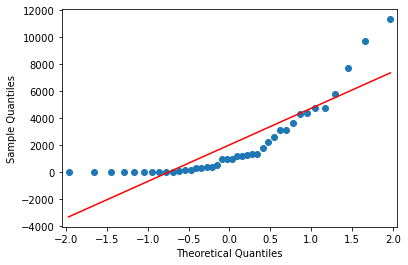

In [31]:
sm.qqplot(df_out[[var_]].sort_values([var_]).dropna(),line='s')
plt.show()

Indicating a positive skew

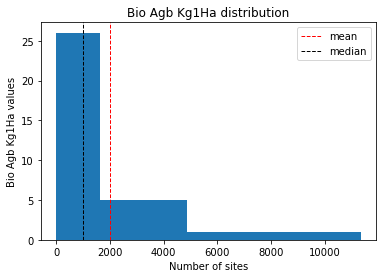

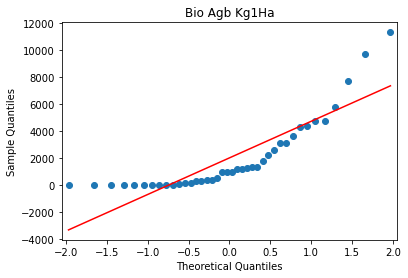

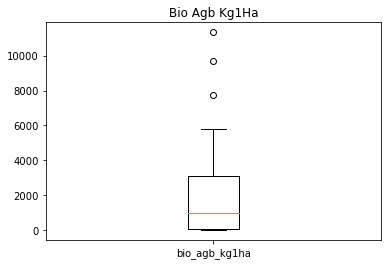

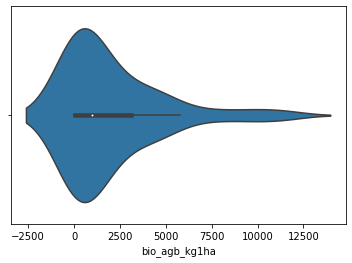

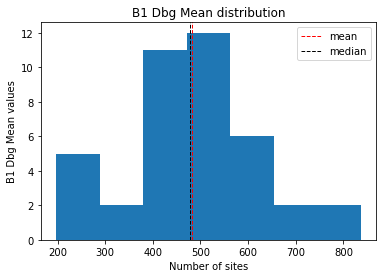

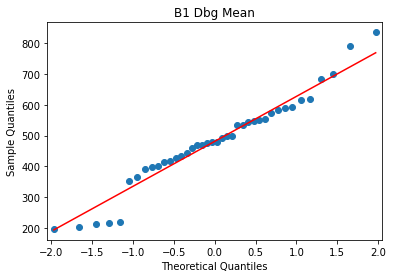

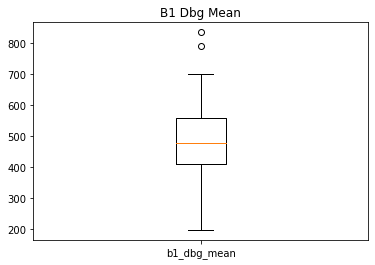

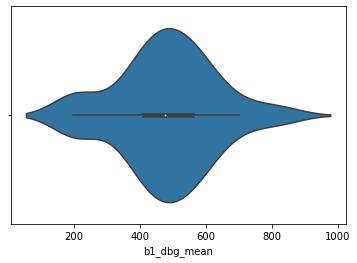

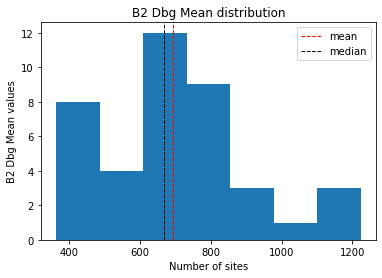

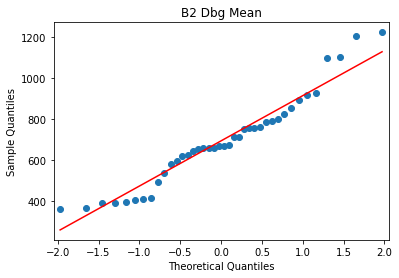

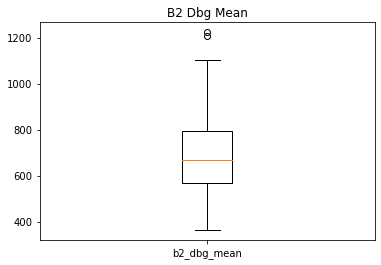

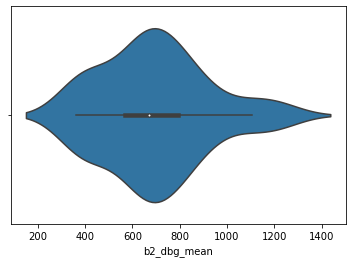

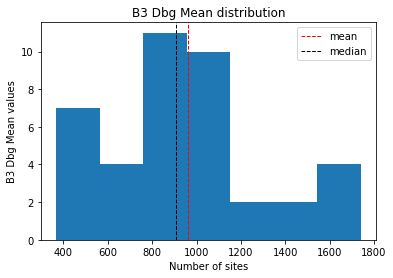

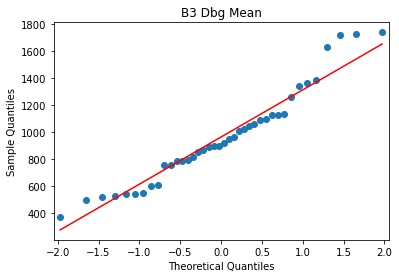

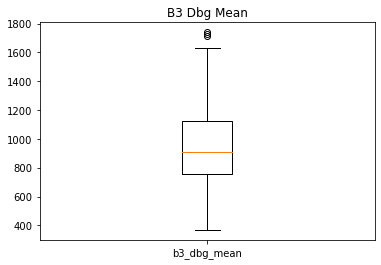

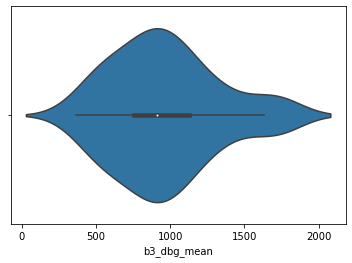

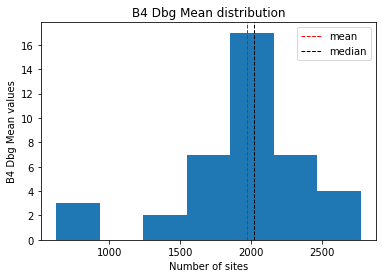

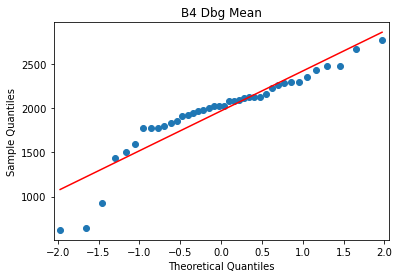

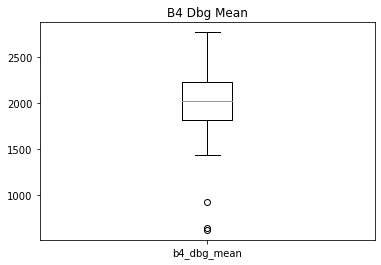

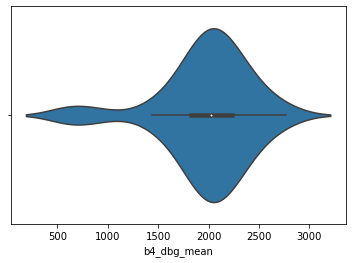

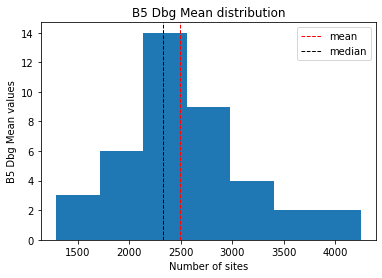

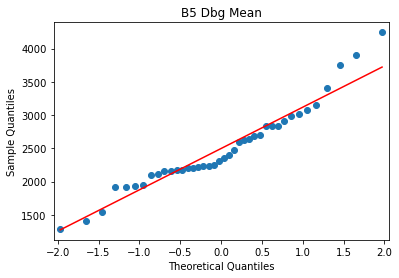

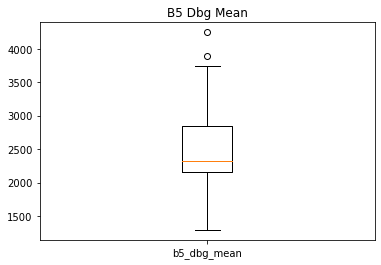

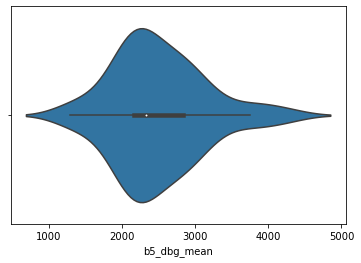

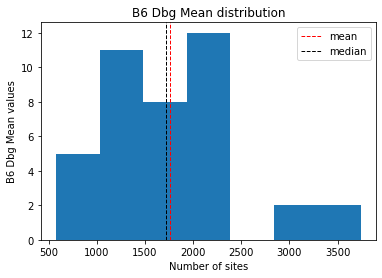

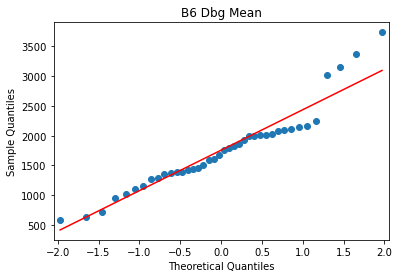

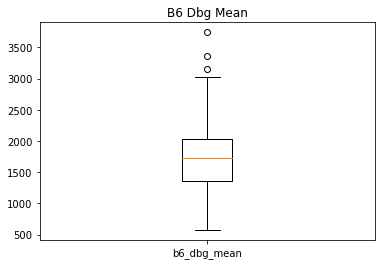

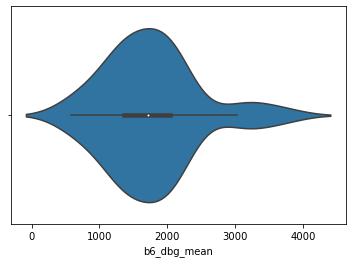

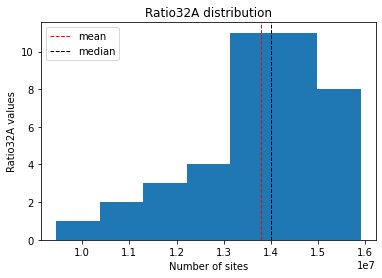

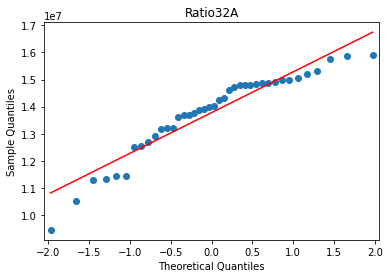

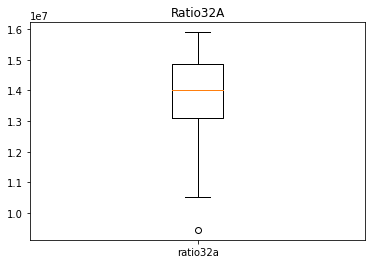

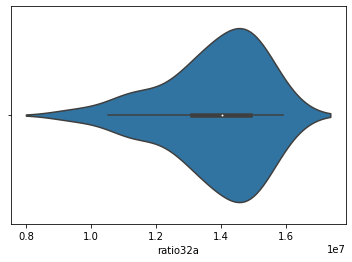

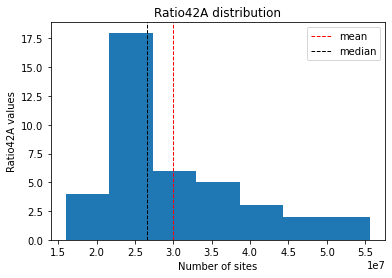

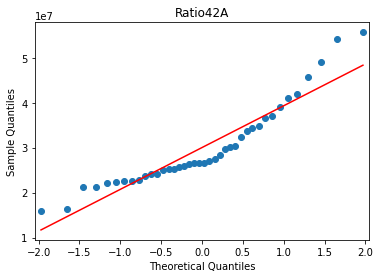

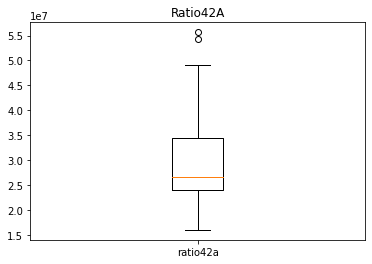

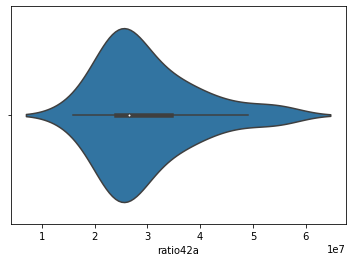

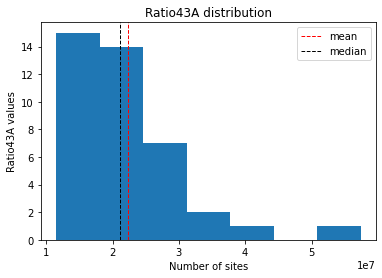

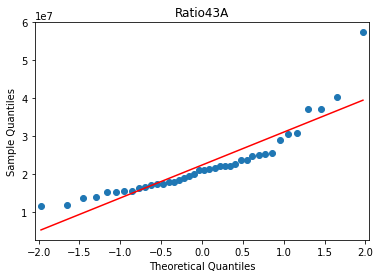

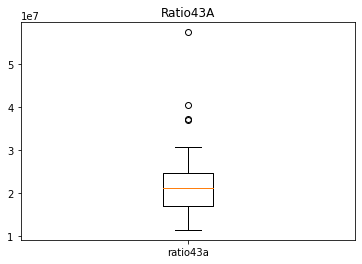

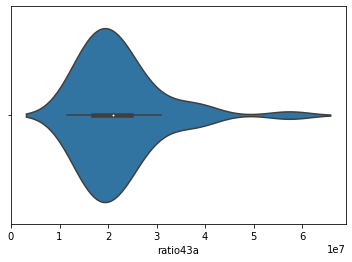

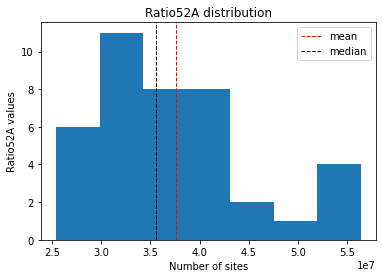

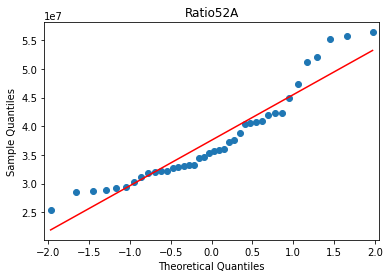

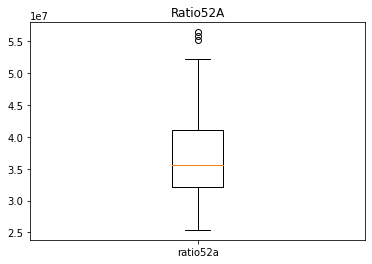

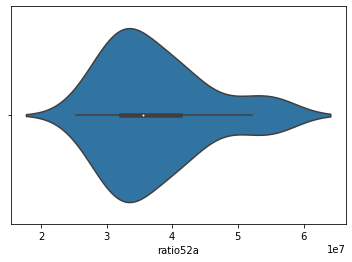

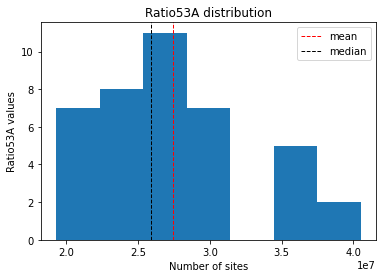

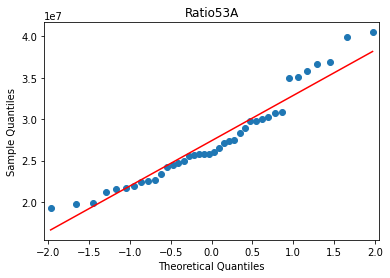

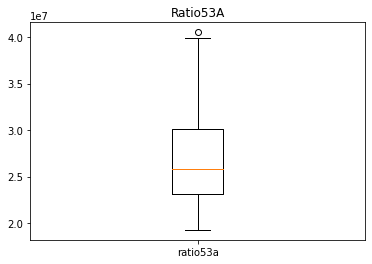

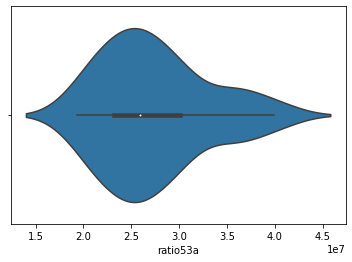

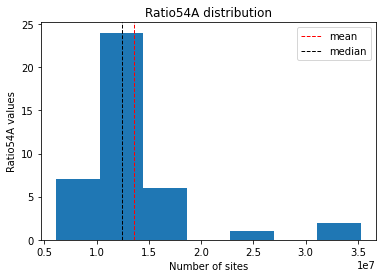

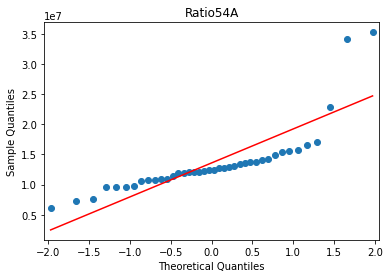

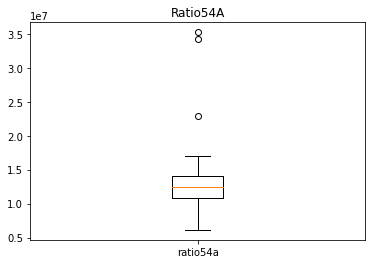

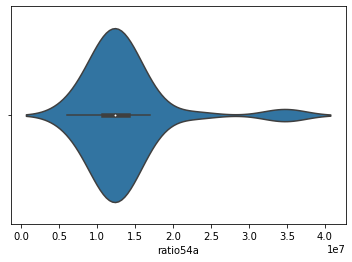

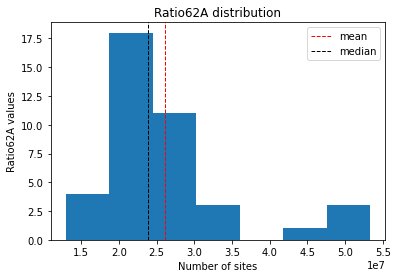

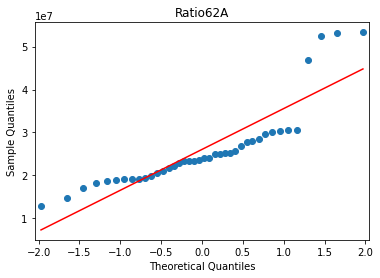

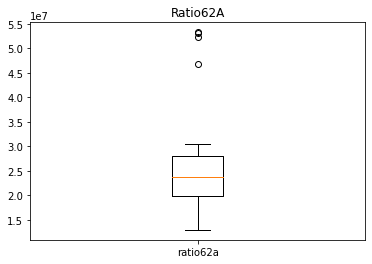

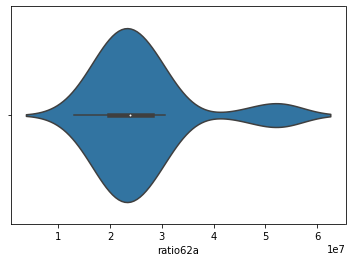

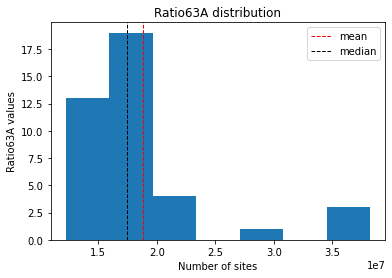

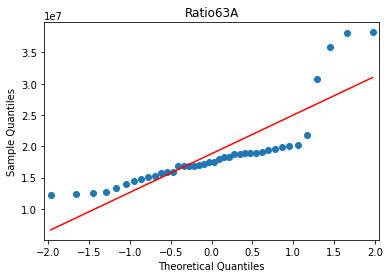

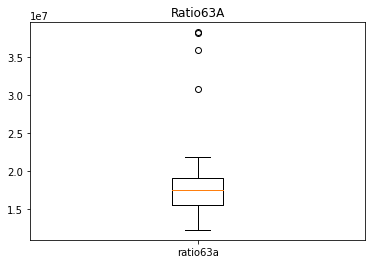

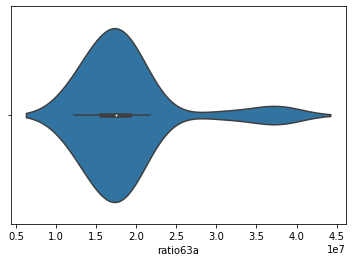

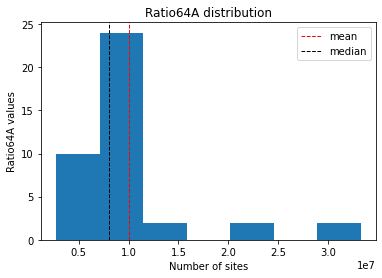

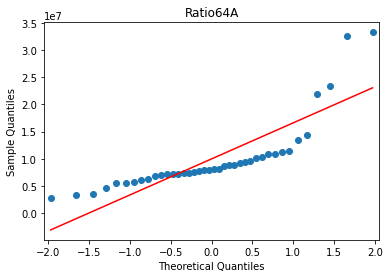

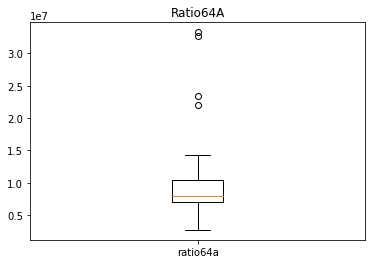

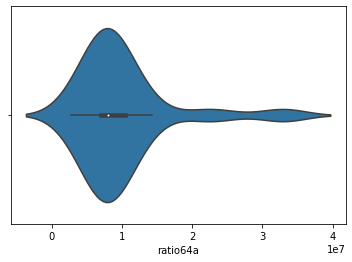

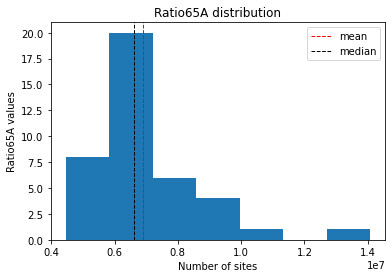

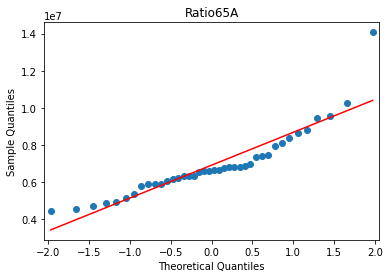

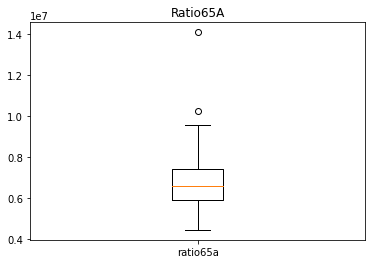

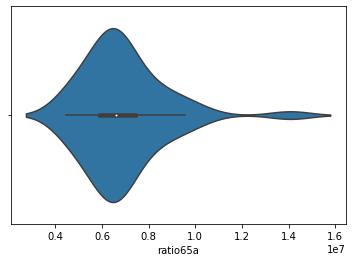

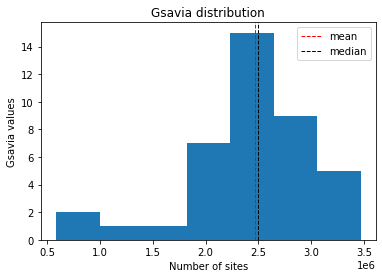

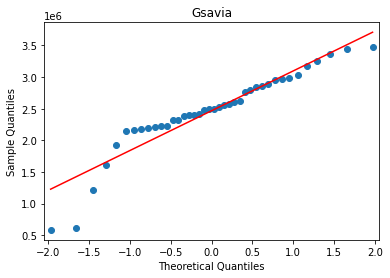

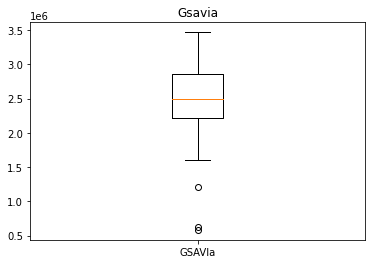

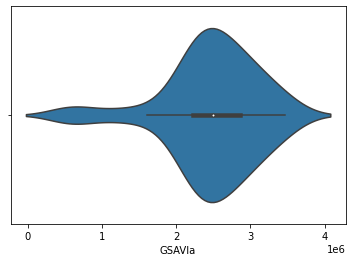

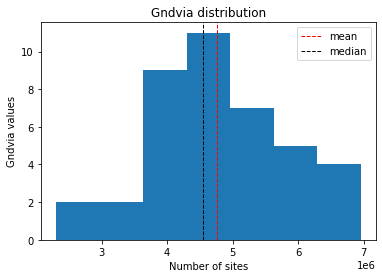

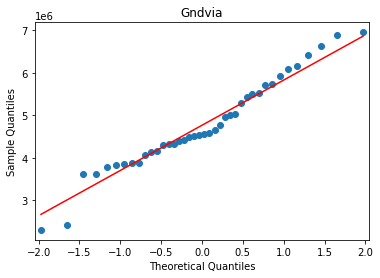

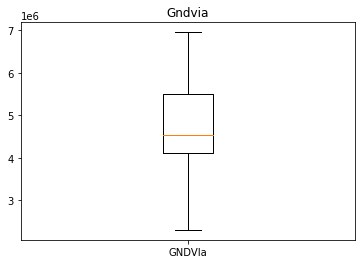

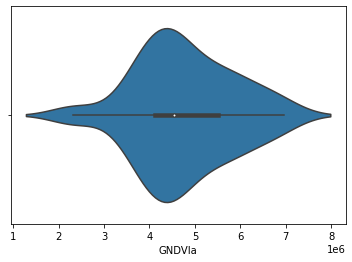

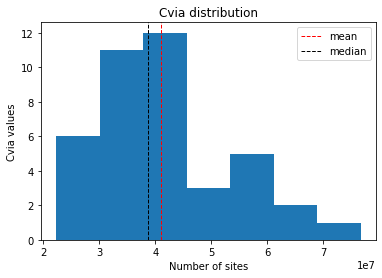

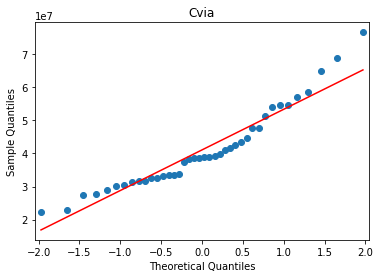

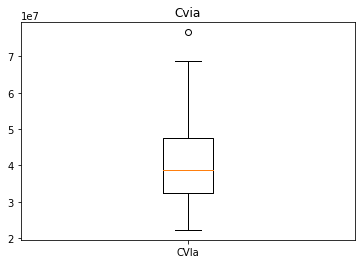

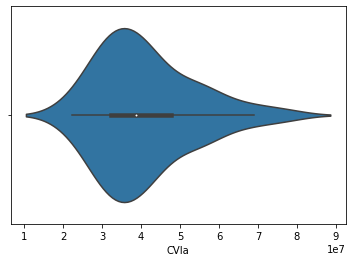

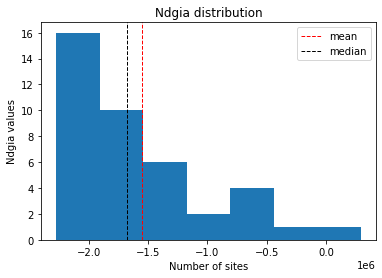

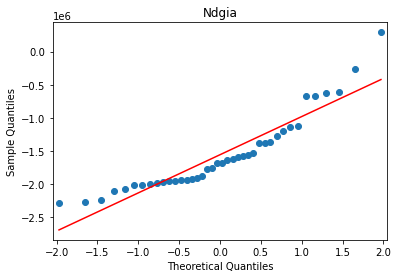

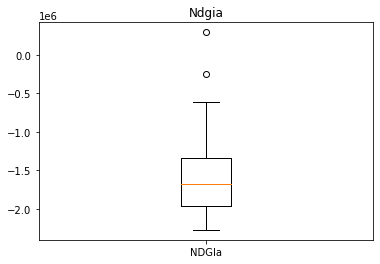

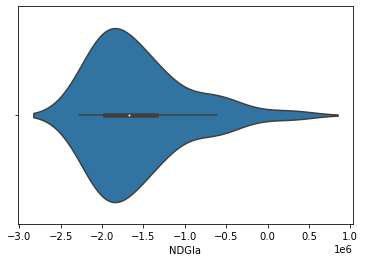

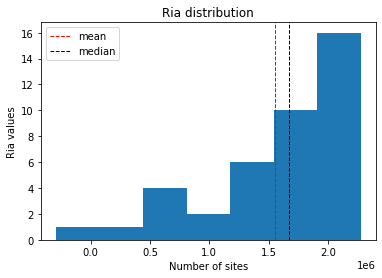

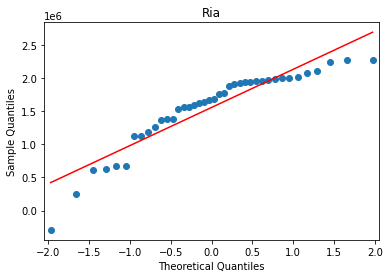

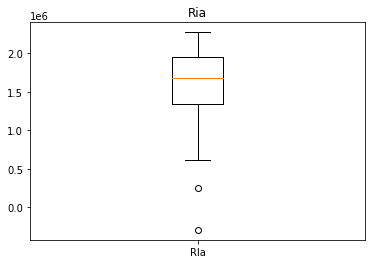

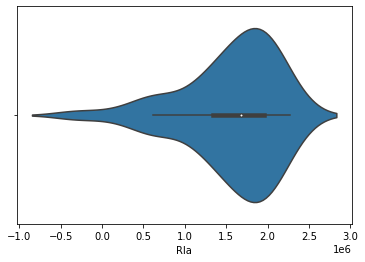

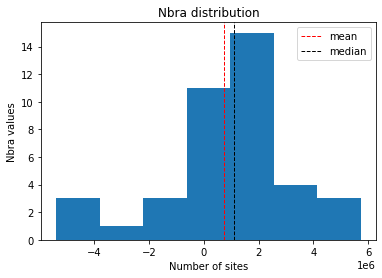

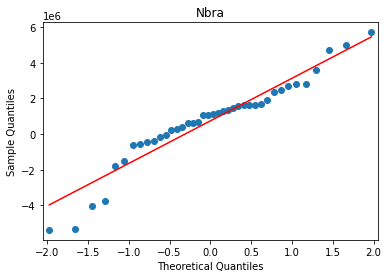

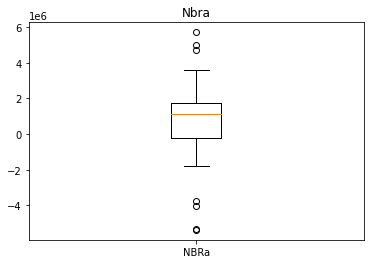

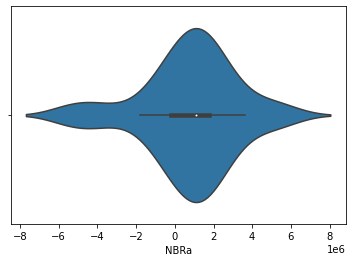

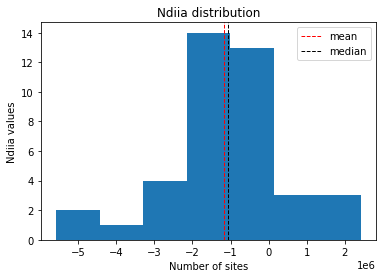

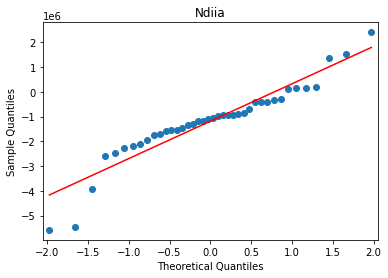

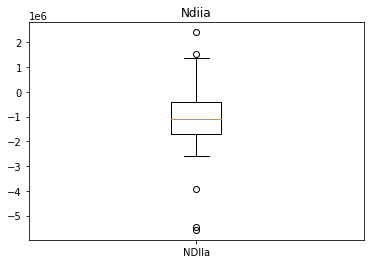

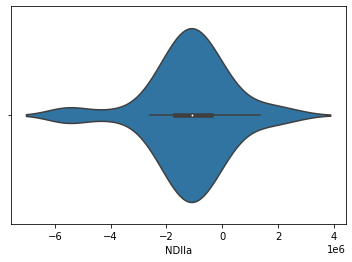

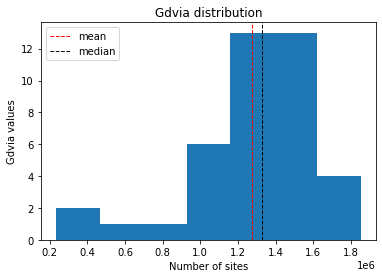

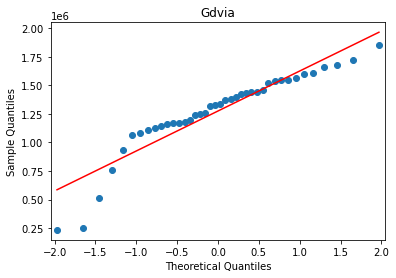

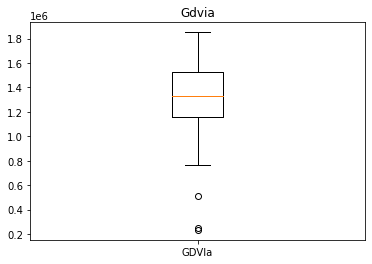

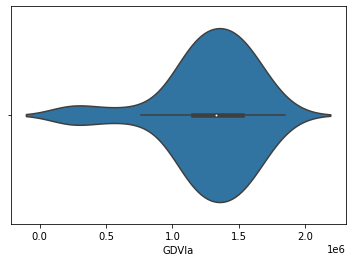

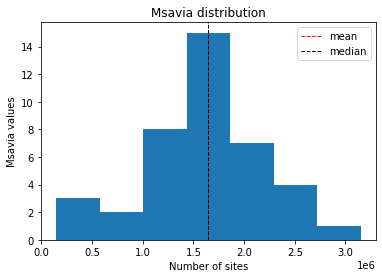

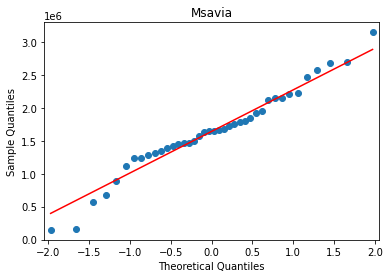

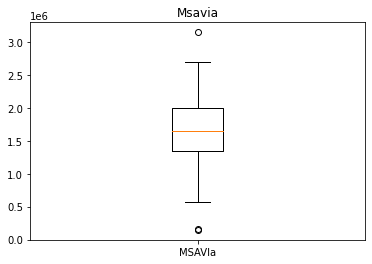

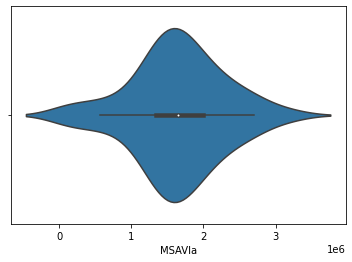

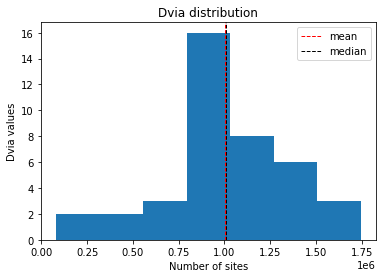

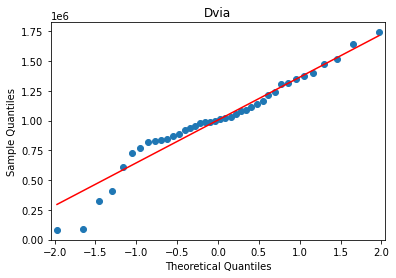

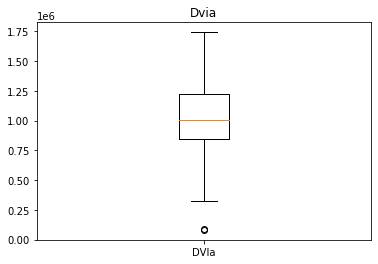

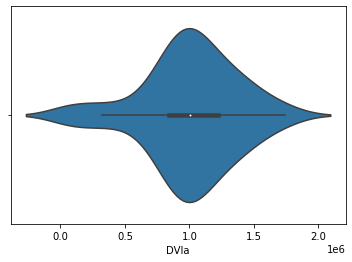

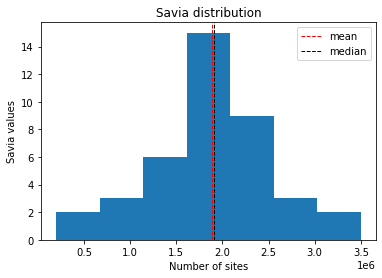

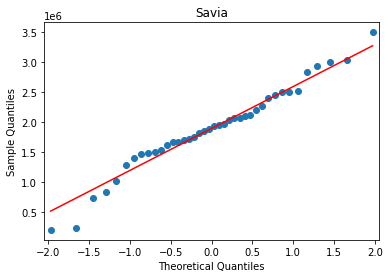

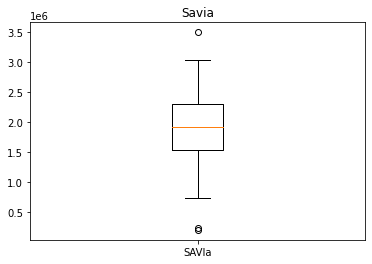

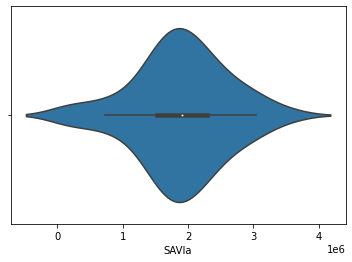

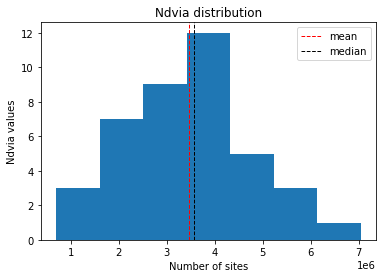

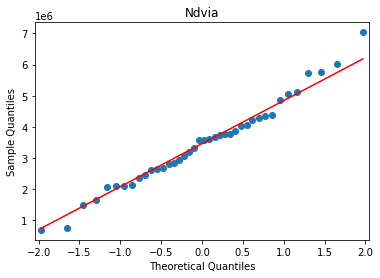

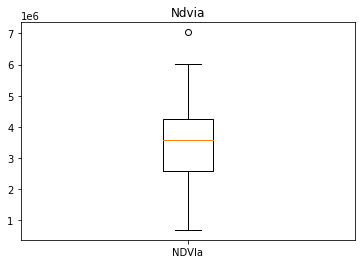

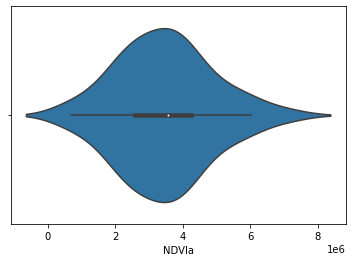

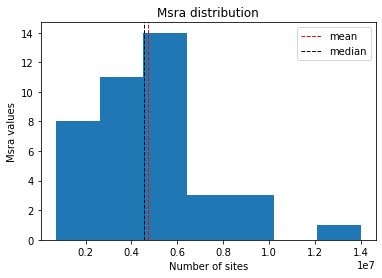

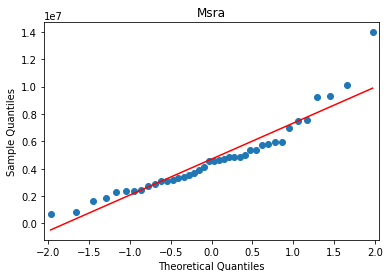

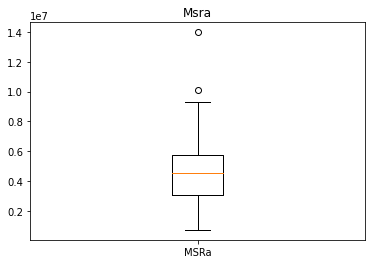

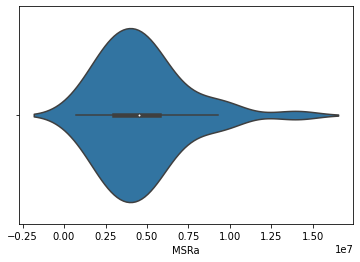

In [32]:
for i in key_var:
    plt.hist(df_out[i], bins=7)
    plt.axvline(df_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_out[i])
    plt.show()
    print("="*50)
    



Violin plot:
 - the black bar with the white dot in the middle is the interquartile range
 - the white dot represents the median.
 - the height at each point (when the violin plot is horizontal) gives us the relative frequency. 
 - the thin black lines to the right/left of the interquartile range are the whiskers 
 - the extreme values are shown in the part of the distribution beyond the whiskers

In [33]:
df_key_out.skew()

bio_agb_kg1ha    1.879997
b1_dbg_mean     -0.028456
b2_dbg_mean      0.541522
b3_dbg_mean      0.630906
b4_dbg_mean     -1.358684
b5_dbg_mean      0.722249
b6_dbg_mean      0.915072
ratio32a        -0.987336
ratio42a         1.178259
ratio43a         2.012691
ratio52a         0.970474
ratio53a         0.753551
ratio54a         2.686979
ratio62a         1.827049
ratio63a         2.147150
ratio64a         2.399048
ratio65a         1.809432
GSAVIa          -1.212475
GNDVIa           0.090804
CVIa             0.994494
NDGIa            1.307791
RIa             -1.307791
NBRa            -0.680204
NDIIa           -0.729694
GDVIa           -1.371338
MSAVIa          -0.173409
DVIa            -0.584431
SAVIa           -0.267042
NDVIa            0.315290
MSRa             1.352116
dtype: float64

In [34]:
df_key_out.kurtosis()

bio_agb_kg1ha    3.432305
b1_dbg_mean      0.402530
b2_dbg_mean      0.134832
b3_dbg_mean     -0.018714
b4_dbg_mean      2.683066
b5_dbg_mean      0.899901
b6_dbg_mean      1.359430
ratio32a         0.570297
ratio42a         1.047903
ratio43a         5.628196
ratio52a         0.241968
ratio53a        -0.091037
ratio54a         8.441357
ratio62a         3.179995
ratio63a         4.451538
ratio64a         5.903279
ratio65a         5.495714
GSAVIa           2.366832
GNDVIa           0.071731
CVIa             0.739617
NDGIa            1.578297
RIa              1.578297
NBRa             1.171445
NDIIa            2.490431
GDVIa            2.364995
MSAVIa           0.625076
DVIa             0.937688
SAVIa            0.583262
NDVIa            0.180866
MSRa             2.749499
dtype: float64

In [35]:
for var in key_var:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value =", '{:.6f}'.format(p))

feature= bio_agb_kg1ha      p-value = 0.000000
feature= b1_dbg_mean      p-value = 0.667455
feature= b2_dbg_mean      p-value = 0.120534
feature= b3_dbg_mean      p-value = 0.122677
feature= b4_dbg_mean      p-value = 0.001123
feature= b5_dbg_mean      p-value = 0.280458
feature= b6_dbg_mean      p-value = 0.005983
feature= ratio32a      p-value = 0.003578
feature= ratio42a      p-value = 0.000001
feature= ratio43a      p-value = 0.000000
feature= ratio52a      p-value = 0.000011
feature= ratio53a      p-value = 0.001001
feature= ratio54a      p-value = 0.000000
feature= ratio62a      p-value = 0.000006
feature= ratio63a      p-value = 0.000000
feature= ratio64a      p-value = 0.000000
feature= ratio65a      p-value = 0.000051
feature= GSAVIa      p-value = 0.010938
feature= GNDVIa      p-value = 0.163432
feature= CVIa      p-value = 0.000000
feature= NDGIa      p-value = 0.000075
feature= RIa      p-value = 0.000075
feature= NBRa      p-value = 0.103757
feature= NDIIa      p-value = 0

In [36]:
thirdq, firstq = df_key_out[var_].quantile(0.75), df_key_out[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-4504.5 <--> 7655.339999999999


In [37]:
df.loc[df[var_]>extvalhigh].T

uid                     139           140           55            56   \
bio_agb_kg1ha  1.293471e+07  1.293471e+07  1.799476e+04  3.519971e+04   
b1_dbg_mean    3.297500e+02  3.505000e+02  9.977778e+01  1.188571e+02   
b2_dbg_mean    4.860625e+02  4.856667e+02  2.094444e+02  2.947143e+02   
b3_dbg_mean    5.759375e+02  6.352500e+02  3.322222e+02  2.581429e+02   
b4_dbg_mean    1.678625e+03  1.456833e+03  1.744333e+03  2.298000e+03   
b5_dbg_mean    2.091812e+03  1.737417e+03  1.695444e+03  1.140143e+03   
b6_dbg_mean    1.097062e+03  9.271667e+02  8.156667e+02  4.161429e+02   
ratio32a       1.184904e+07  1.307996e+07  1.586207e+07  8.759089e+06   
ratio42a       3.453517e+07  2.999657e+07  8.328382e+07  7.797382e+07   
ratio43a       2.914596e+07  2.293323e+07  5.250502e+07  8.902048e+07   
ratio52a       4.303588e+07  3.577385e+07  8.094960e+07  3.868638e+07   
ratio53a       3.632013e+07  2.735012e+07  5.103344e+07  4.416713e+07   
ratio54a       1.246146e+07  1.192598e+07  9.719727e+06  4.961457e+06   
ratio62a       2.257040e+07  1.909060e+07  3.894430e+07  1.412021e+07   
ratio63a       1.904829e+07  1.459530e+07  2.455184e+07  1.612064e+07   
ratio64a       6.535483e+06  6.364260e+06  4.676094e+06  1.810891e+06   
ratio65a       5.244555e+06  5.336467e+06  4.810931e+06  3.649919e+06   
GSAVIa         2.495812e+06  2.098401e+06  3.311520e+06  3.959431e+06   
GNDVIa         5.508318e+06  5.002576e+06  7.859703e+06  7.731481e+06   
CVIa           4.084955e+07  3.930535e+07  1.325537e+08  6.859225e+07   
NDGIa         -8.388310e+05 -1.339286e+06 -2.273567e+06  6.521740e+05   
RIa            8.388310e+05  1.339286e+06  2.273567e+06 -6.521740e+05   
NBRa           2.093694e+06  2.219891e+06  3.630324e+06  6.934414e+06   
NDIIa         -1.095781e+06 -8.800500e+05  1.424830e+05  3.368237e+06   
GDVIa          1.192000e+06  9.710000e+05  1.535000e+06  2.004000e+06   
MSAVIa         1.930824e+06  1.430074e+06  2.591707e+06  3.768014e+06   
DVIa           1.103000e+06  8.210000e+05  1.412000e+06  2.040000e+06   
SAVIa          2.281125e+06  1.736709e+06  2.993217e+06  4.049762e+06   
NDVIa          4.895695e+06  3.926351e+06  6.801541e+06  7.981221e+06   
MSRa           7.082918e+06  5.142369e+06  1.291945e+07  1.984456e+07   

uid                     57            58            60          54   \
bio_agb_kg1ha  2.570169e+04  2.663629e+04  1.133813e+04     18757.2   
b1_dbg_mean    3.244167e+02  3.407778e+02  4.010625e+02       359.5   
b2_dbg_mean    3.790000e+02  4.105556e+02  4.943125e+02       398.5   
b3_dbg_mean    3.312500e+02  3.873333e+02  5.200625e+02       307.1   
b4_dbg_mean    1.694250e+03  1.750889e+03  1.924562e+03      2485.3   
b5_dbg_mean    1.035417e+03  1.081000e+03  1.411750e+03      1314.5   
b6_dbg_mean    4.472500e+02  4.845556e+02  6.395625e+02       516.6   
ratio32a       8.740106e+06  9.434371e+06  1.052093e+07   7706399.0   
ratio42a       4.470317e+07  4.264682e+07  3.893413e+07  62366374.0   
ratio43a       5.114717e+07  4.520367e+07  3.700637e+07  80928036.0   
ratio52a       2.731970e+07  2.633018e+07  2.855987e+07  32986198.0   
ratio53a       3.125786e+07  2.790878e+07  2.714578e+07  42803647.0   
ratio54a       6.111357e+06  6.174007e+06  7.335433e+06   5289100.0   
ratio62a       1.180079e+07  1.180244e+07  1.293842e+07  12963614.0   
ratio63a       1.350189e+07  1.251004e+07  1.229780e+07  16821882.0   
ratio64a       2.639811e+06  2.767483e+06  3.323158e+06   2078622.0   
ratio65a       4.319517e+06  4.482475e+06  4.530282e+06   3930011.0   
GSAVIa         2.788774e+06  2.807263e+06  2.891615e+06   3971204.0   
GNDVIa         6.343464e+06  6.203704e+06  5.913978e+06   7238987.0   
CVIa           3.903579e+07  4.028852e+07  4.099723e+07  48161347.0   
NDGIa          6.760560e+05  2.885820e+05 -2.564100e+05   1290780.0   
RIa           -6.760560e+05 -2.885820e+05  2.564100e+05  -1290780.0   
NBRa           5.824381e+06  5.666965e+06  5.013656e+06   6561146.0   
NDIIa          2.414804e+06  2.3

In [38]:
df_key_out_out = df_key.loc[df_key[var_]<extvalhigh]

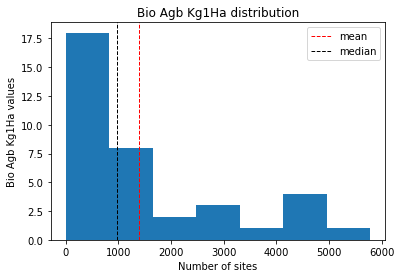

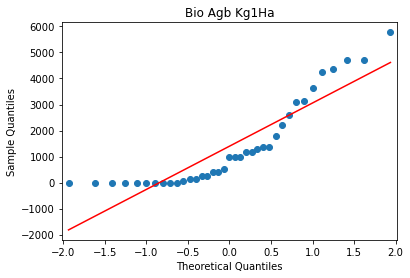

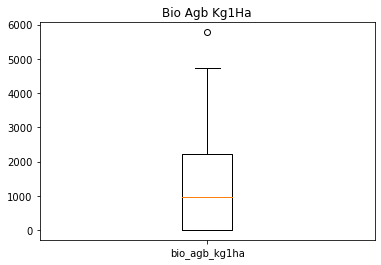

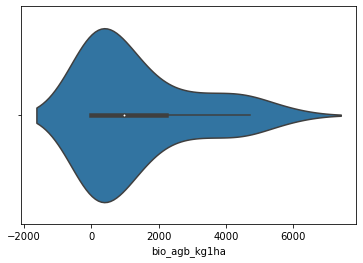

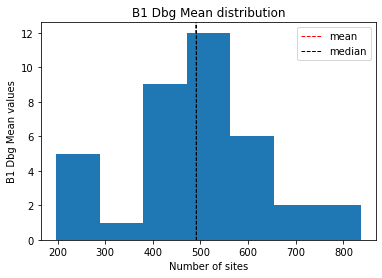

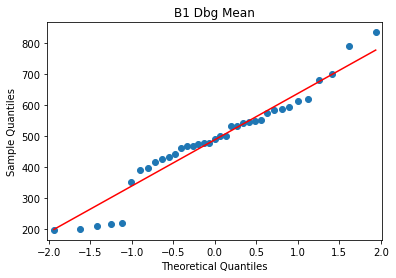

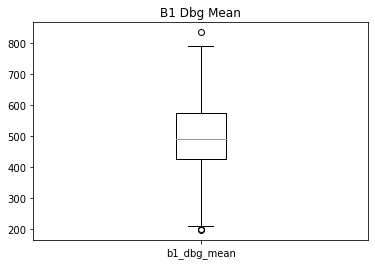

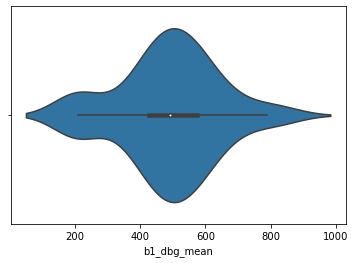

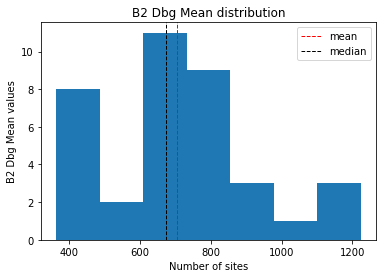

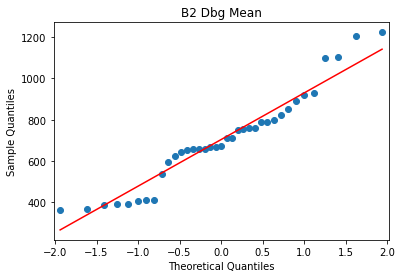

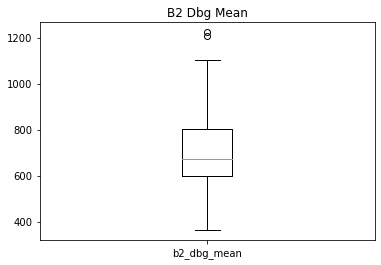

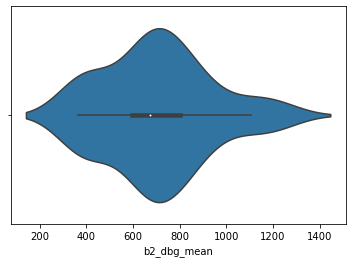

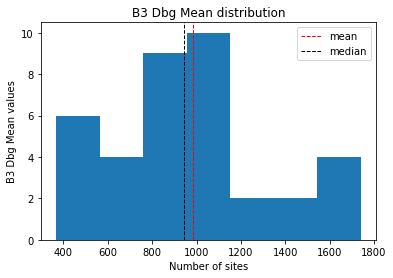

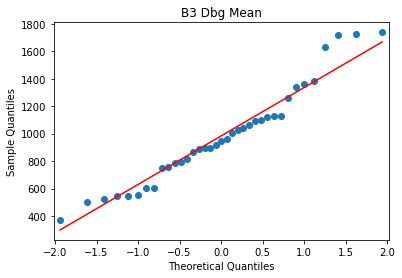

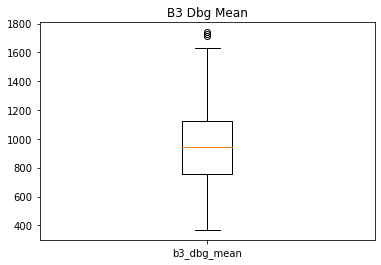

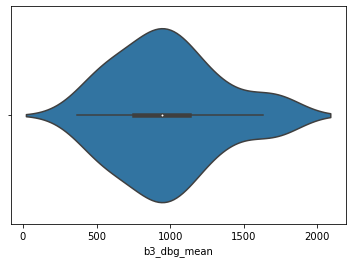

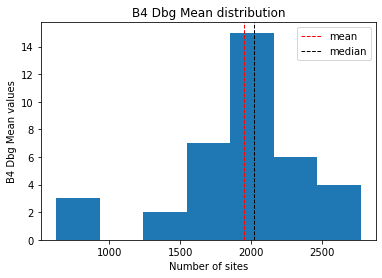

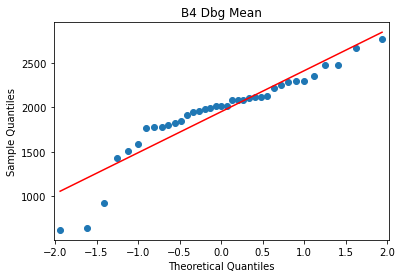

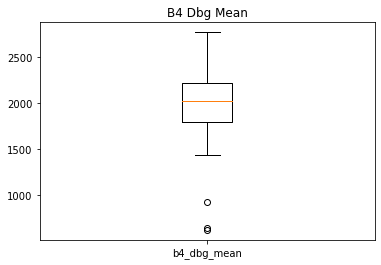

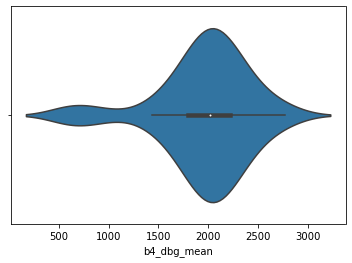

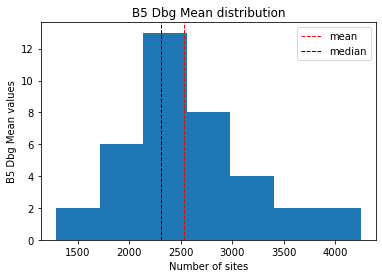

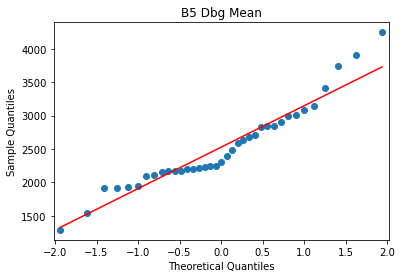

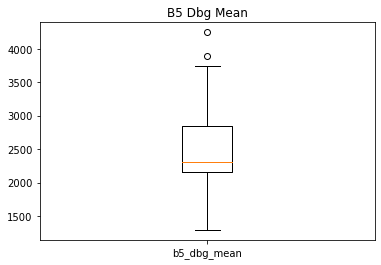

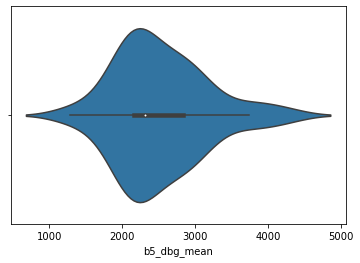

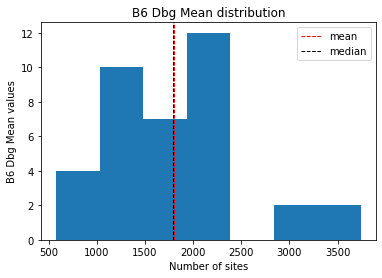

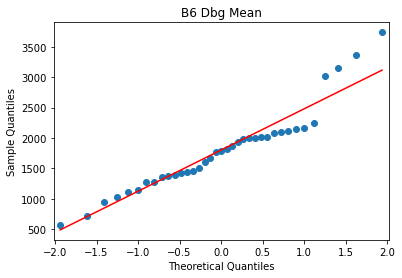

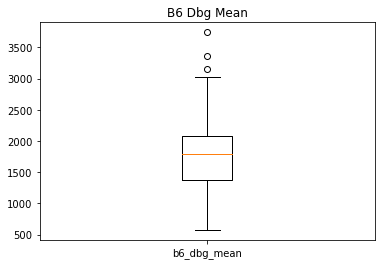

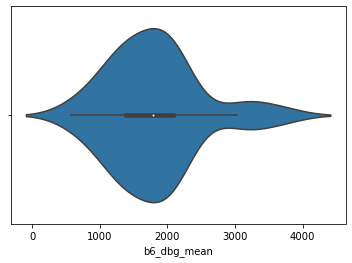

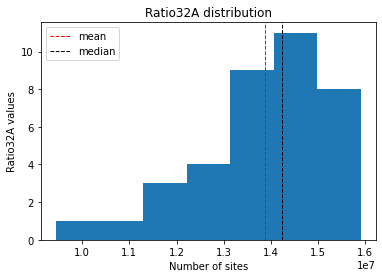

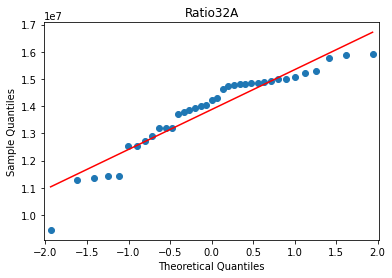

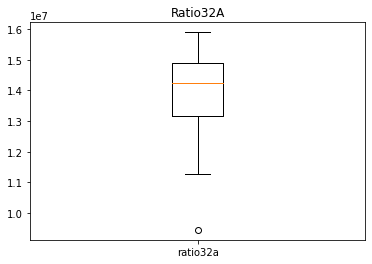

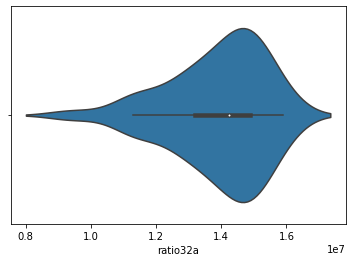

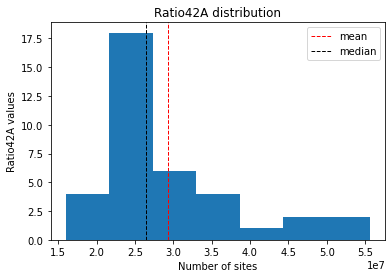

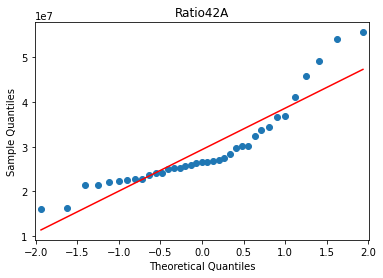

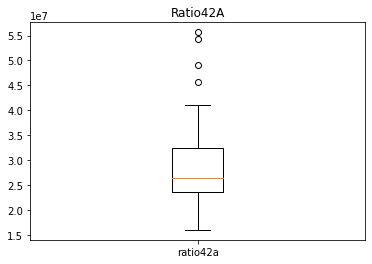

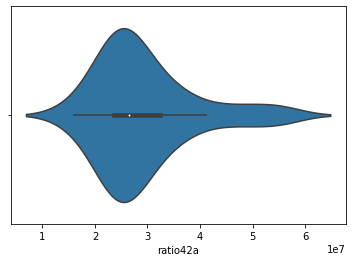

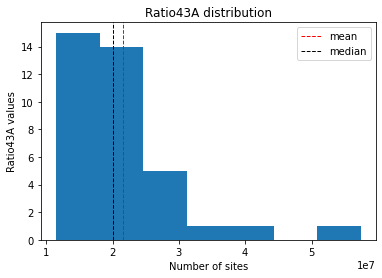

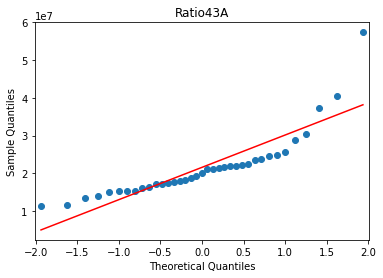

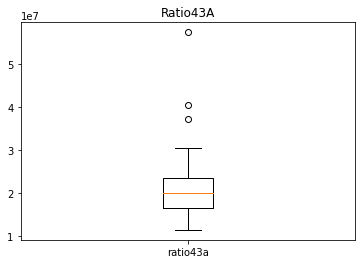

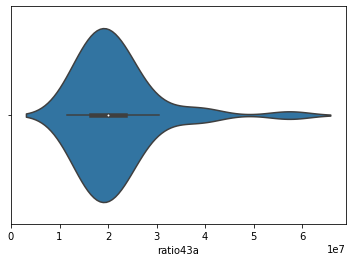

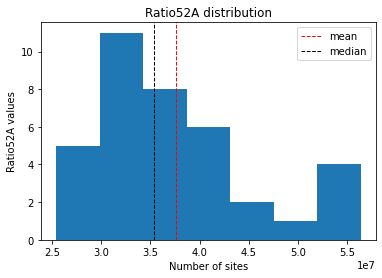

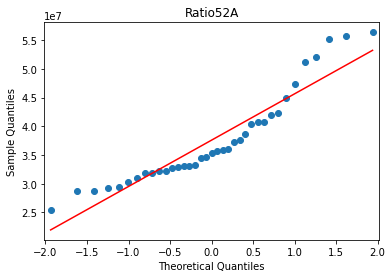

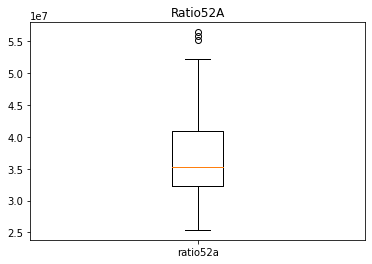

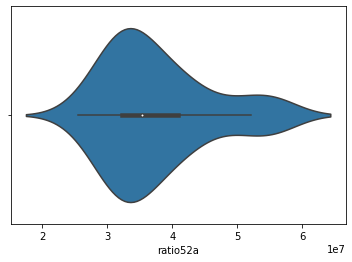

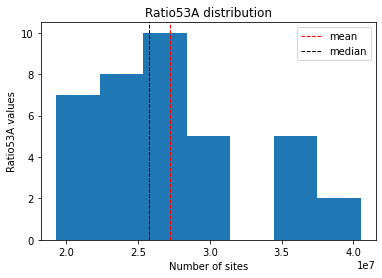

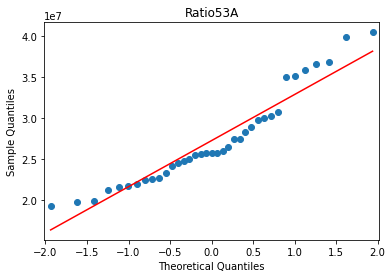

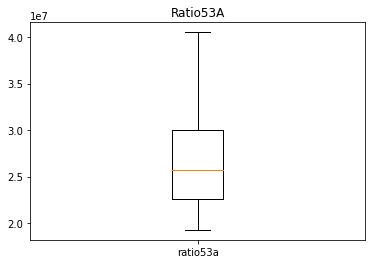

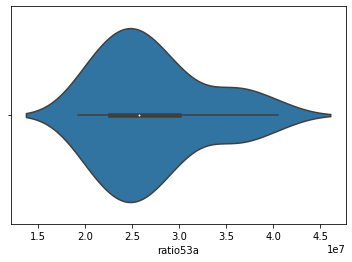

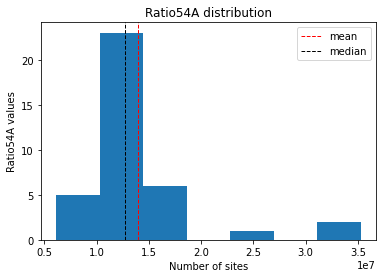

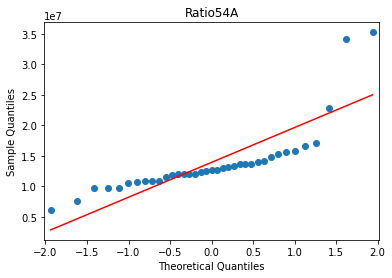

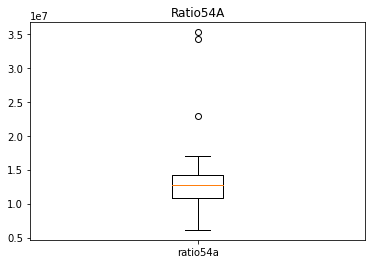

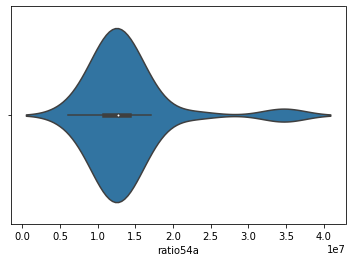

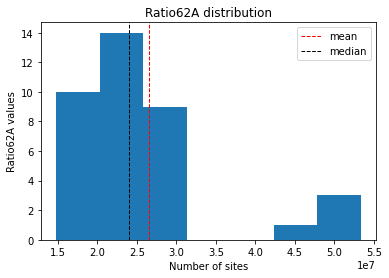

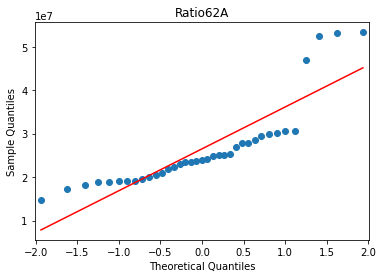

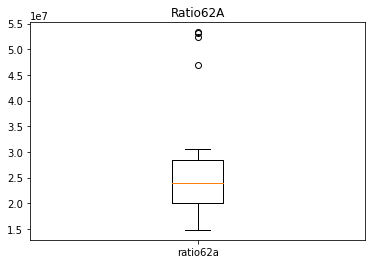

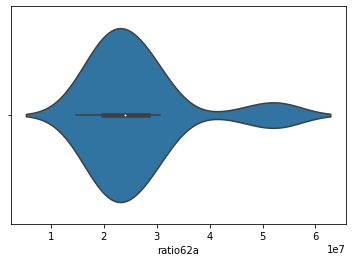

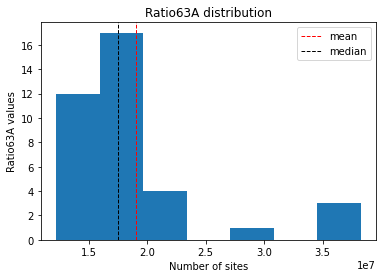

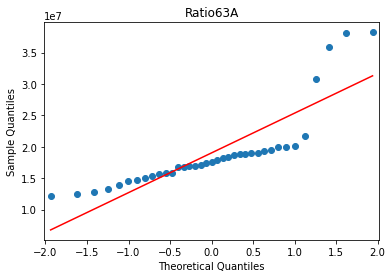

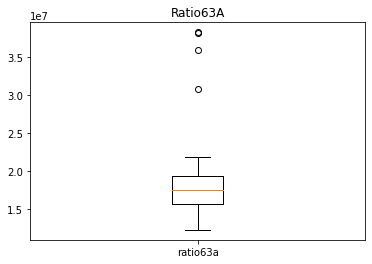

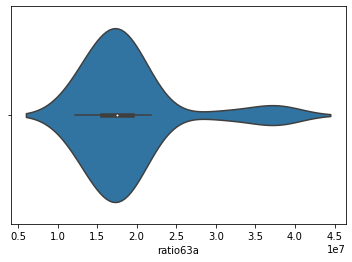

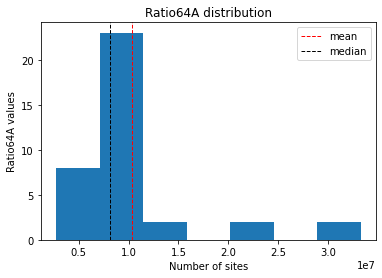

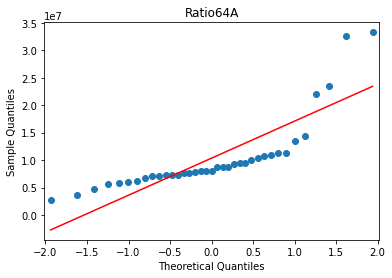

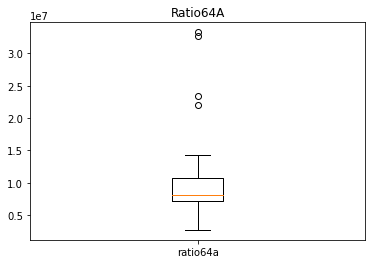

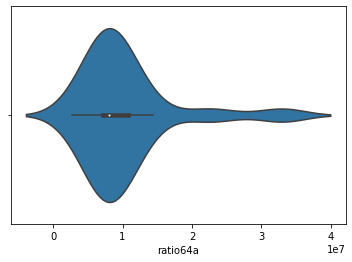

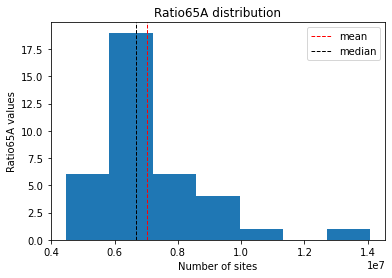

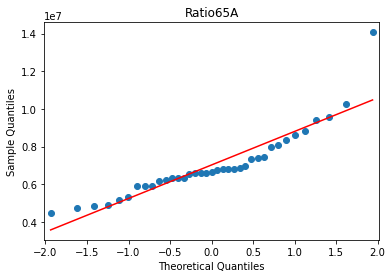

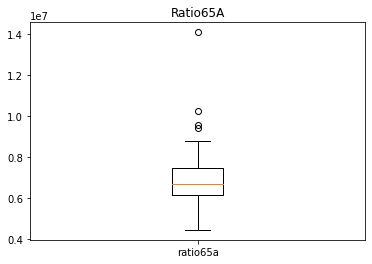

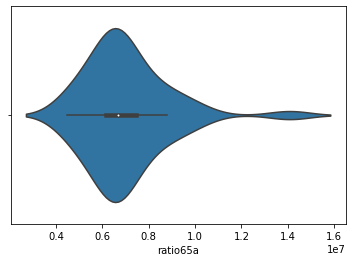

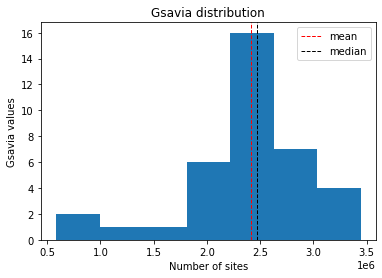

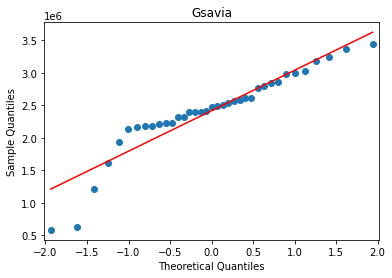

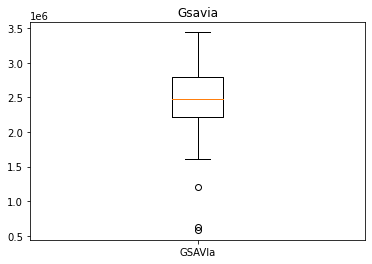

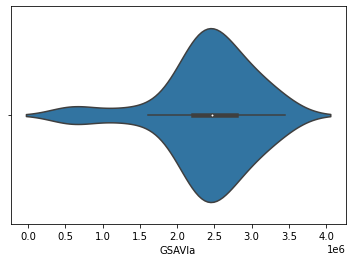

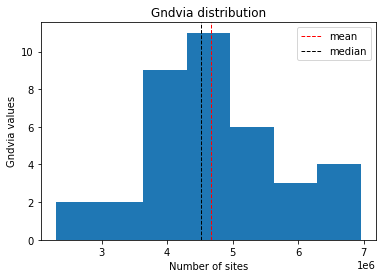

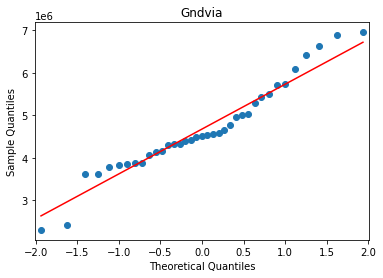

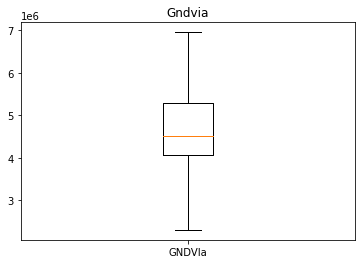

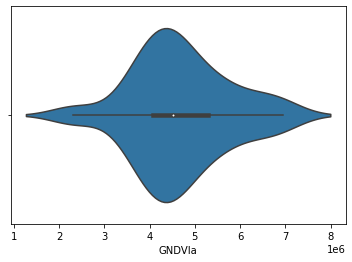

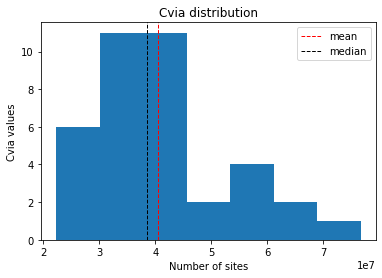

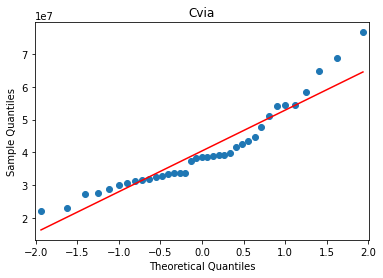

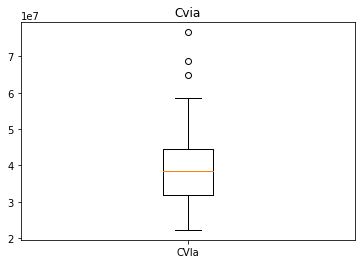

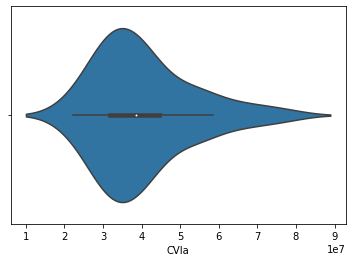

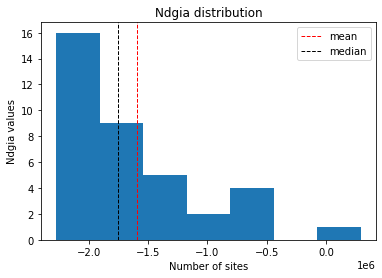

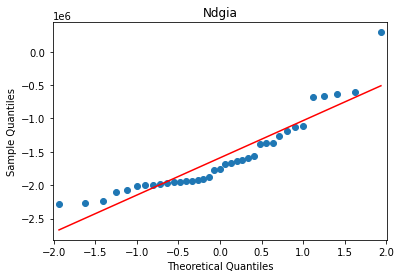

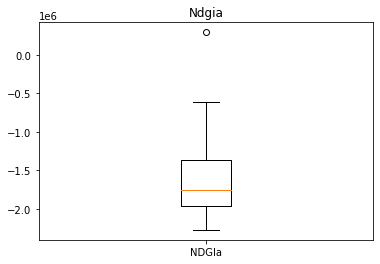

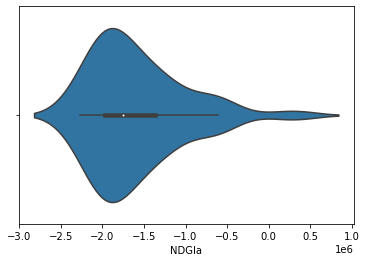

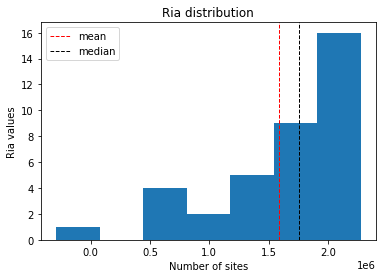

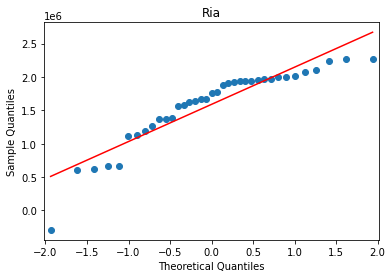

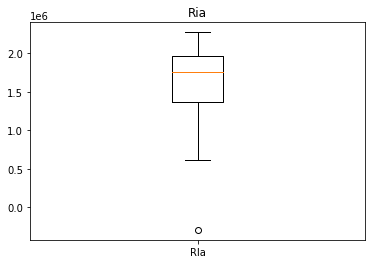

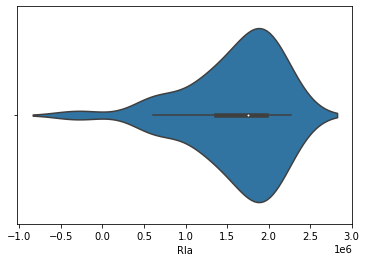

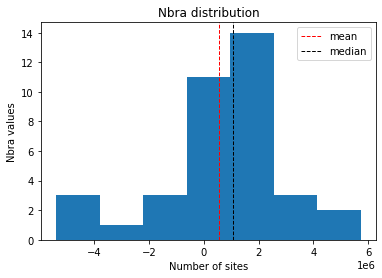

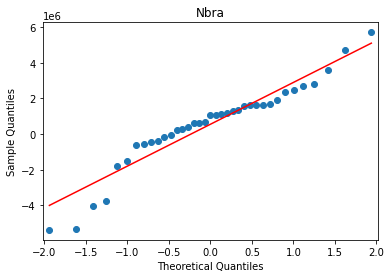

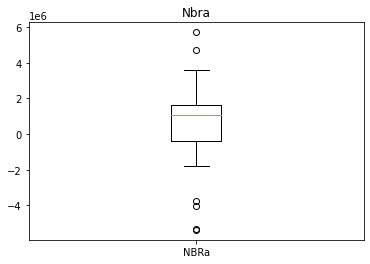

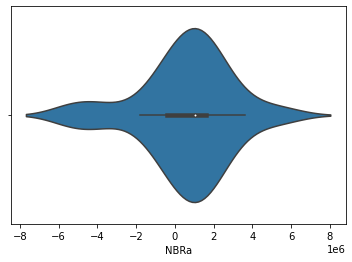

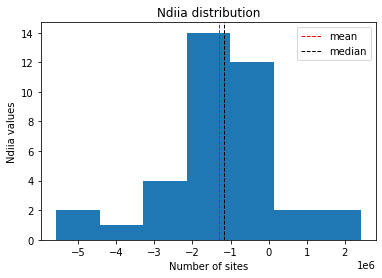

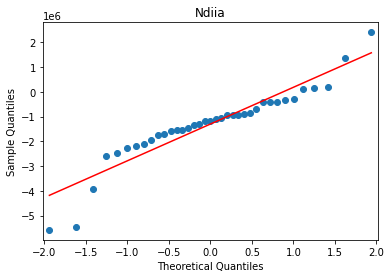

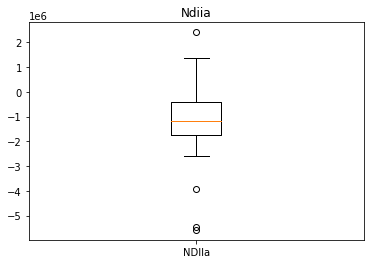

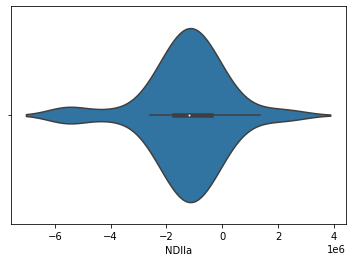

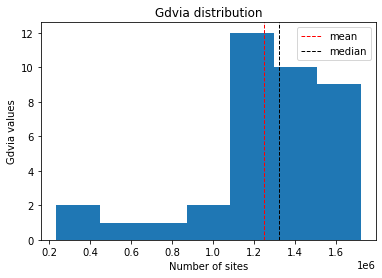

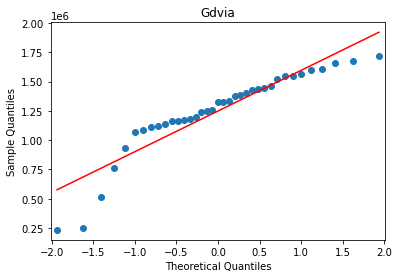

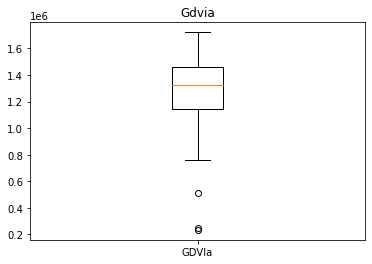

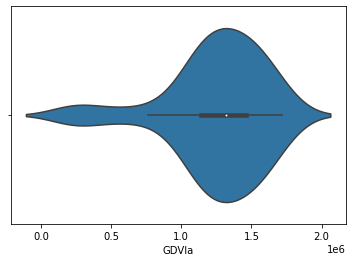

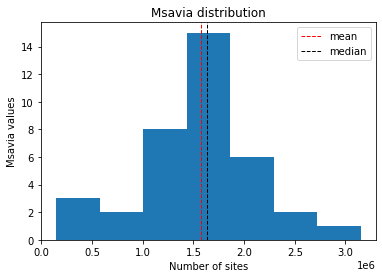

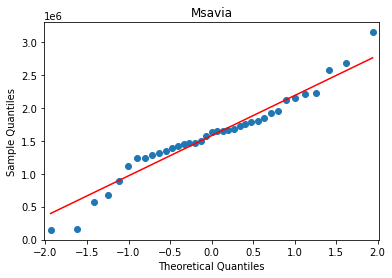

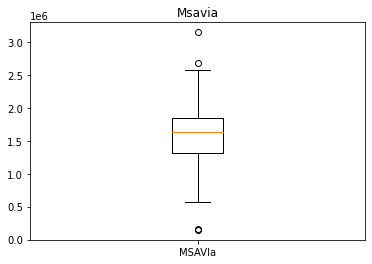

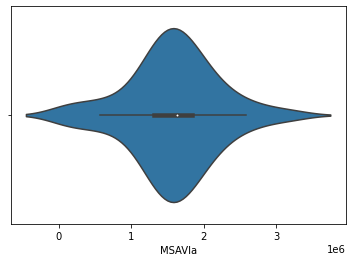

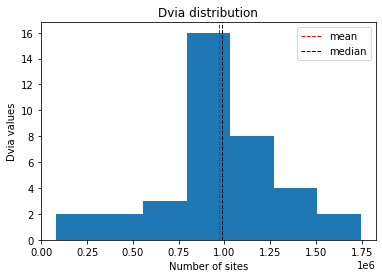

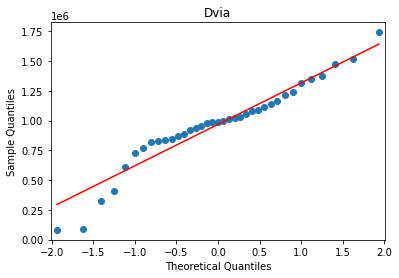

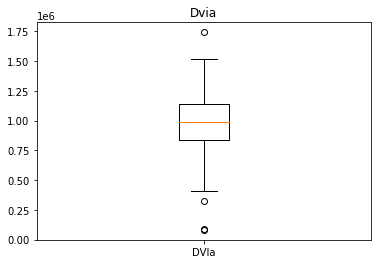

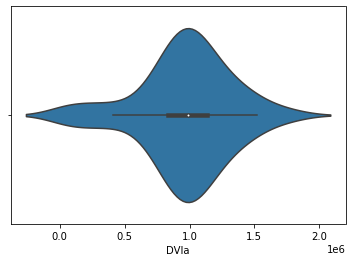

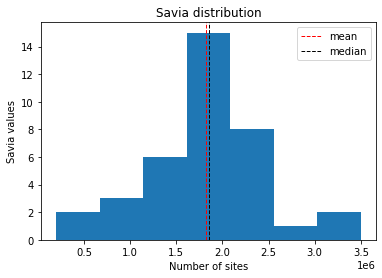

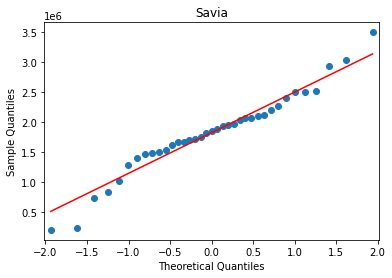

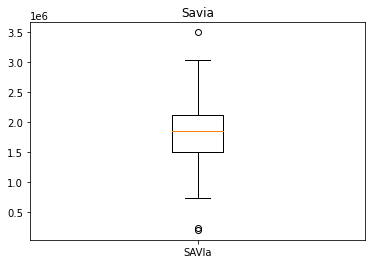

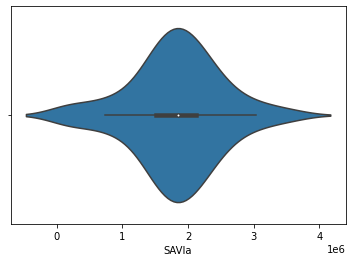

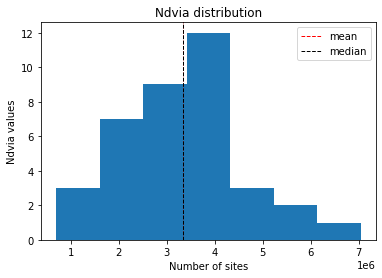

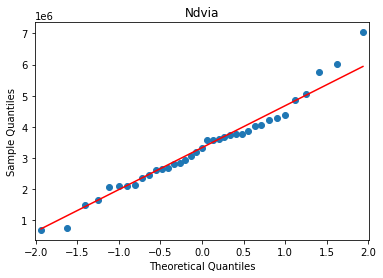

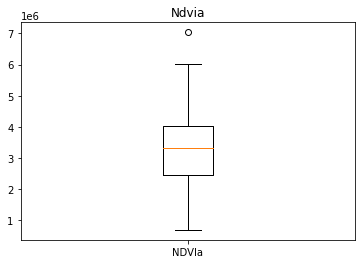

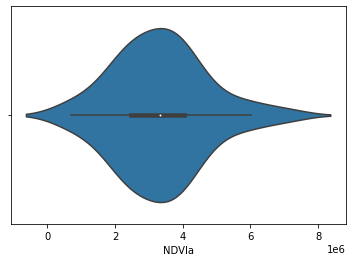

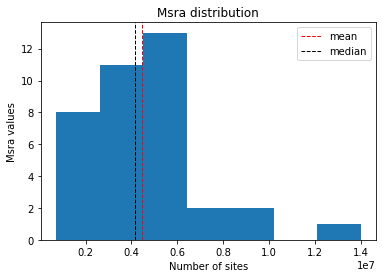

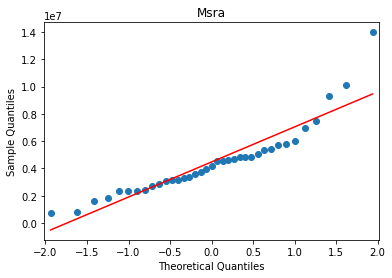

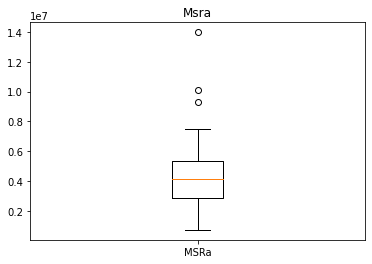

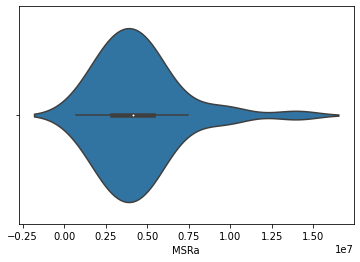

In [39]:
for i in key_var:
    plt.hist(df_key_out_out[i], bins=7)
    plt.axvline(df_key_out_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_key_out_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_key_out_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_key_out_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_key_out_out[i])
    plt.show()
    print("="*50)
    

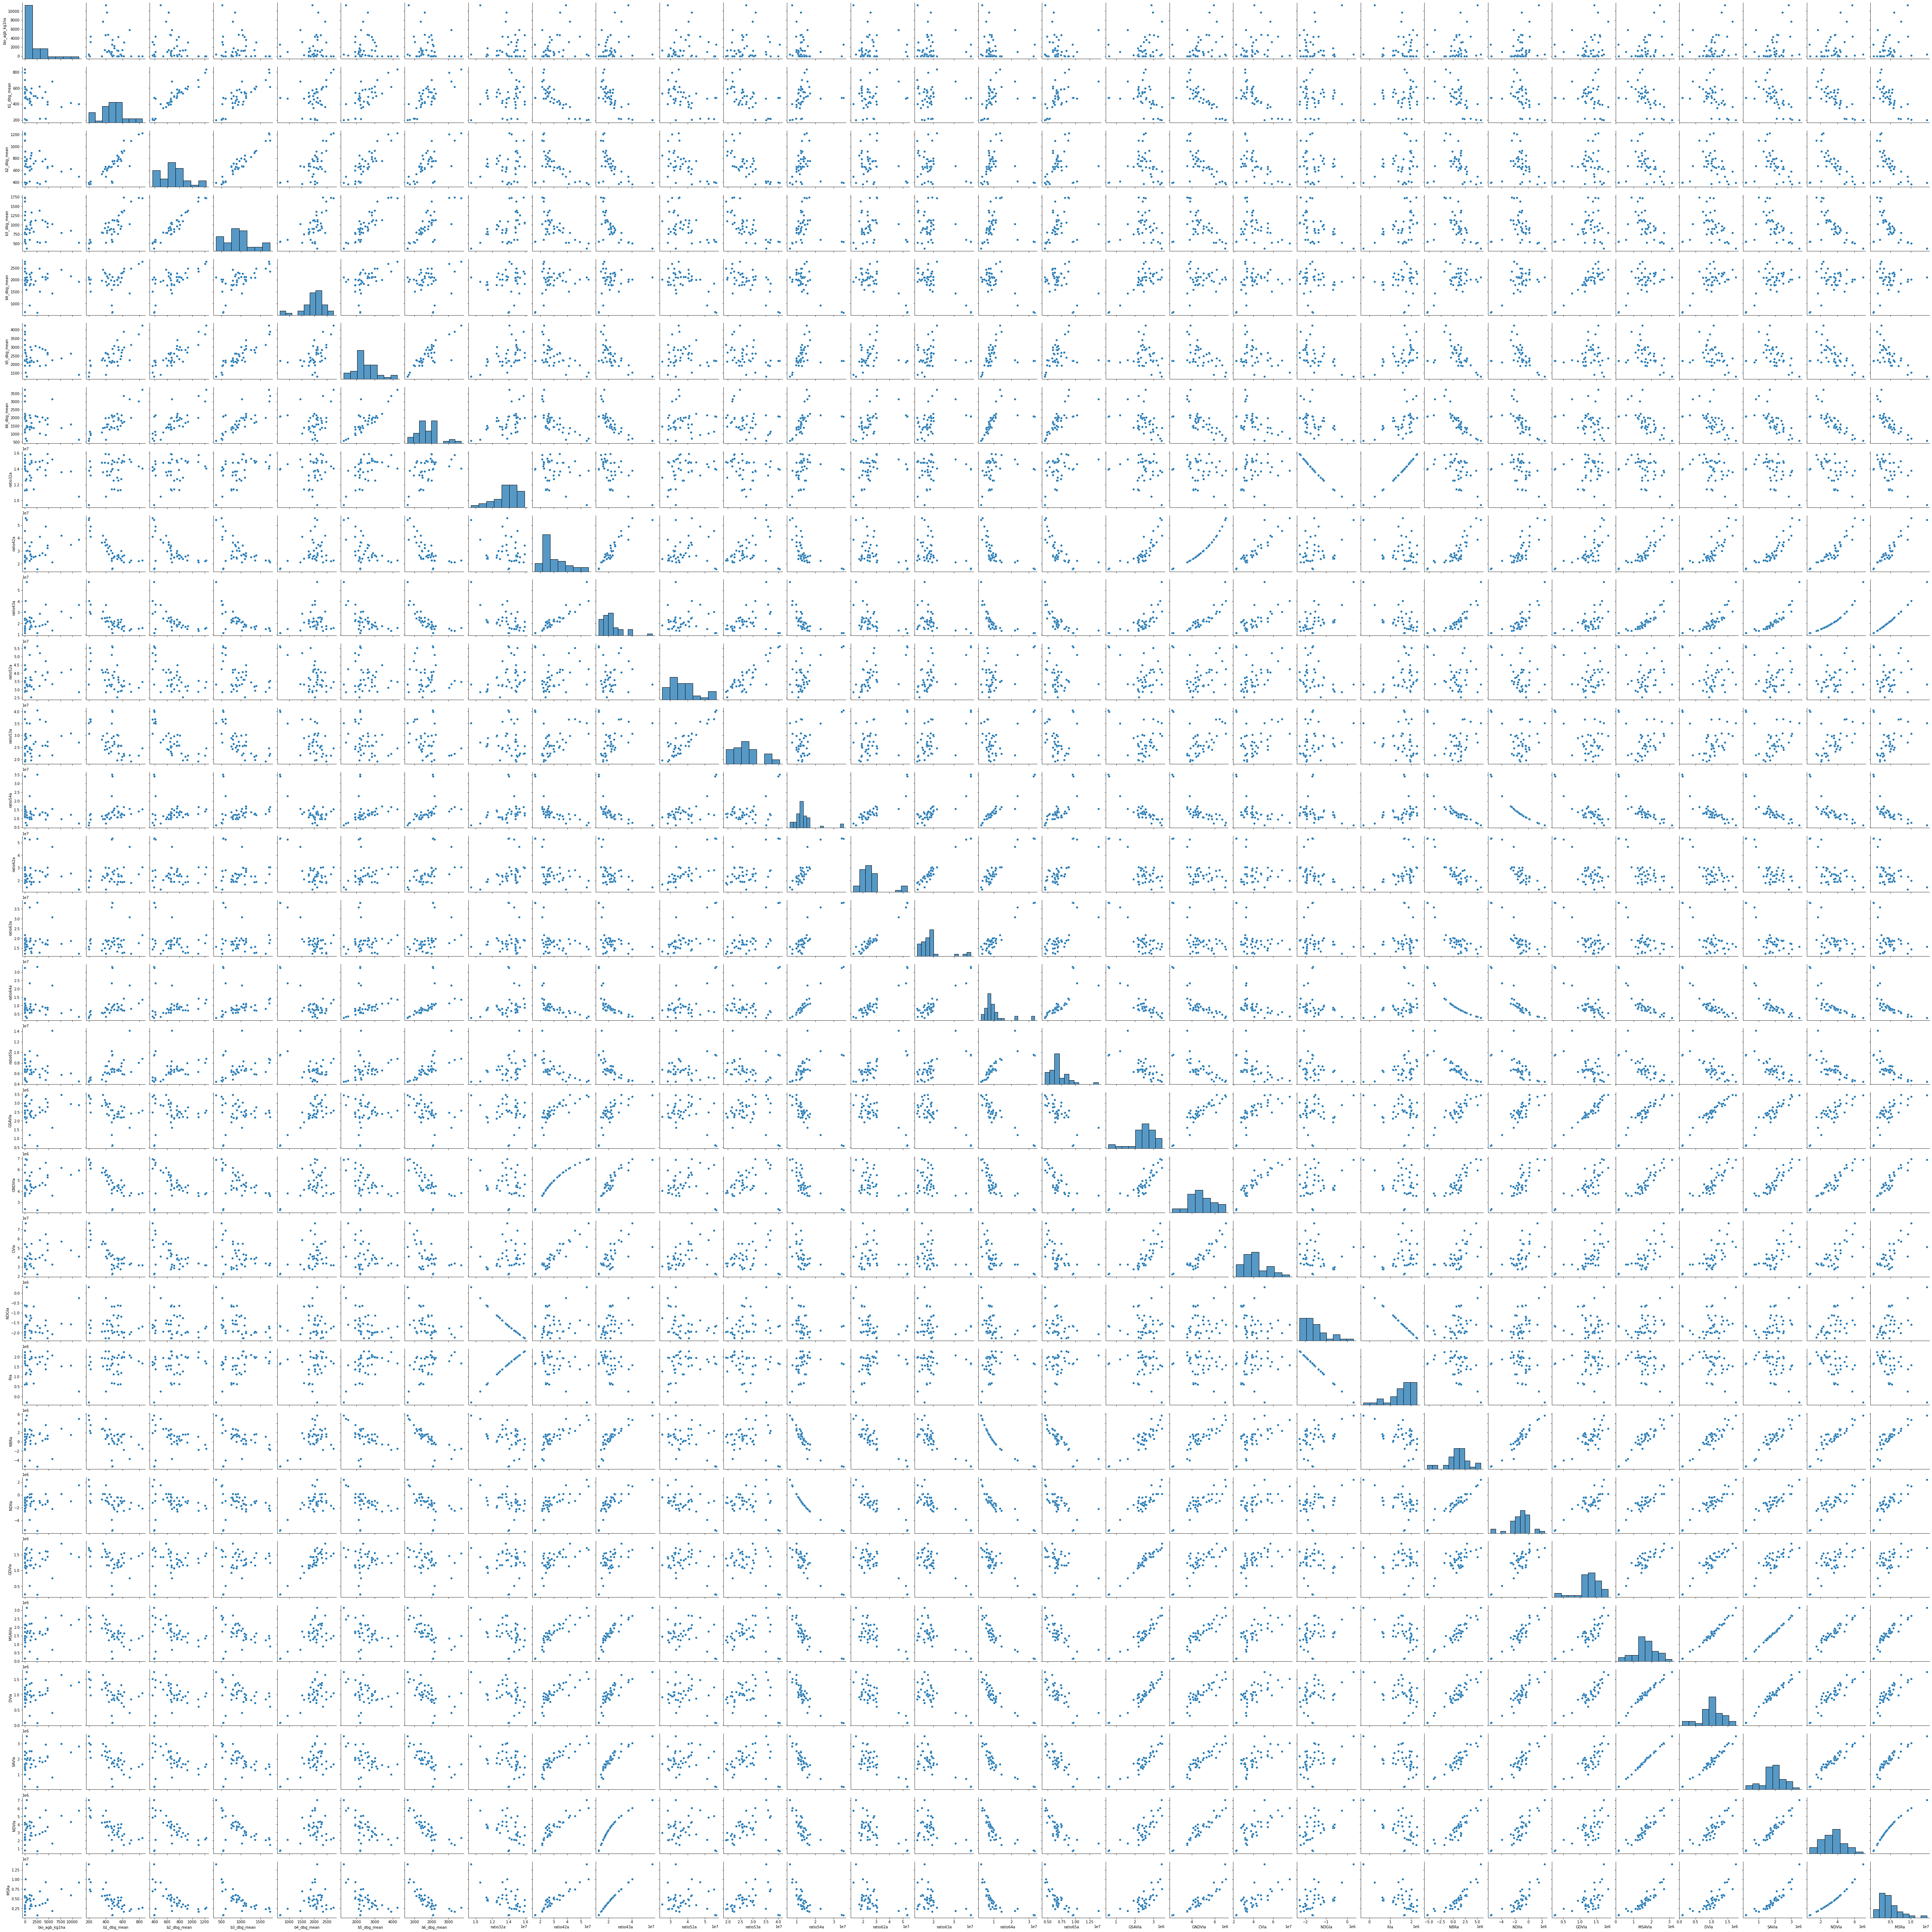

In [41]:
sns.pairplot(df_out)

<AxesSubplot:xlabel='b2_dbg_mean', ylabel='bio_agb_kg1ha'>

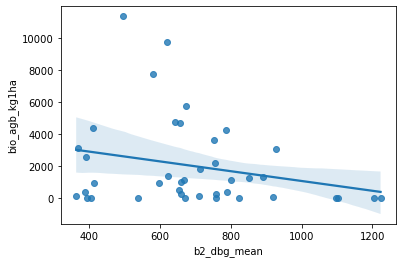

In [43]:
sns.regplot(y = df_out.bio_agb_kg1ha, x=df_out.b2_dbg_mean)